<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Optimising Resources at the Museum to Cater for Changes in Visitor Attendance Due to Weather Conditions

--- 
This notebook covers two main components: (1) Data preparation & cleaning; and (2) Data Analysis.

---

## Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

Weather can be a key concern for visitors when choosing a place of interest to visit, when preparing their trip and during their stay. Weather may drive individual decision making one direction in some circumstances, and another direction in others. 

Singapore's tropical climate with abundant rainfall, high and uniform temperatures and high humidity all year round, could influence museum-going behaviours. It is thus valuable to examine how Singapore's weather conditions influence attendance at places of interest such as the museums, so that the museums can better cater resources (e.g. soft-book schedules of more docents on days with expected high footfall to provide more guided tours for visitors,..).  

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has typical tropical climate with abundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. 

For indoor leisure activities, the plausible weather-related state dependence of payoffs for a substitute (outdoor leisure) would imply that on poor weather days, demand for indoor leisure rises. Despite the simplicity of this logic, the analysis of data based on the various places of interest in Singapore reveal only a modest relationship between weather conditions and demand. This implies that individuals largely fail to respond to rainfall when making leisure decisions, or that there exist more complex channels through which weather affects demand. Notwithstanding, the findings provide to a certain extent, helpful information on how higher museum attendance is associated with different weather conditions, and by extension the expected resourcing needed at the museums to cater for the increase in visitors. It is observed that a combination of weather conditions can also have an impact on the number of museum visitors.

## Weather Data

There are 7 weather-related datasets from [data.gov.sg](data.gov.sg) included in the [`data`](./data/) folder for this project. These are:
* [`rainfall-monthly-highest-daily-total.csv`](../data/rainfall-monthly-highest-daily-total.csv): The maximum amount of rainfall within a day for each month from 1982 to 2022. 
* [`rainfall-monthly-number-of-rain-days.csv`](./data/rainfall-monthly-number-of-rain-days.csv): Monthly number of rain days from 1982 to 2022. A day is considered to have “rained” if the total rainfall for that day is 0.2mm or more.
* [`rainfall-monthly-total.csv`](./data/rainfall-monthly-total.csv): Monthly total rain recorded in mm(millimeters) from 1982 to 2022
* [`sunshine-duration-monthly-mean-daily-duration.csv`](https://data.gov.sg/dataset/sunshine-duration-monthly-mean-daily-duration): Monthly mean sunshine duration in hours from 1982 to 2022
* [`surface-air-temperature-monthly-mean.csv`](https://data.gov.sg/dataset/surface-air-temperature-mean-daily-minimum): Monthly mean air temperature from 1982 to 2022
* [`relative-humidity-monthly-mean.csv`](https://data.gov.sg/dataset/relative-humidity-monthly-mean): Monthly mean relative humidity from 1982 to 2022
* [`wet-bulb-temperature-hourly.csv`](https://data.gov.sg/dataset/wet-bulb-temperature-hourly): Hourly wet-bulb temperature from 1982 to 2022


## Attendance Data

There is 1 attendance-related dataset included in the [`data`](./data/) folder for this project, obtained from [SINGSTAT TABLEBUILDER](https://tablebuilder.singstat.gov.sg/). It is as follows:
* [`data/monthly_visitorship.csv`](https://tablebuilder.singstat.gov.sg/table/TS/M891071): Number of visitors to selected places of interest from 1990 to 2022

## Problem Statement

The CEO of a local museum consortium would like to understand periods of the year when the weather conditions would be associated with higher attendance, to facilitate resource allocation. 

As seen from various research (elaborated further below), attendance is expected to be affected by weather conditions. The CEO has tasked us to identify how attendance at the museum is associated with weather conditions and identify relevant periods to step up resources.

This project attempts to examine the trends and relationships of the various weather variables (e.g. temperature, humidity, rainfall,..) with attendance to a few indoor and outdoor attractions, in particular the museums. The aim is to identify observations guiding the museums in allocating resources and refining its programmes, and to understand the effect on complementary leisure activities.

## Outside Research

Prior Literature

A number of existing papers hold particular relevance because of their attention to leisure decisions and their treatment of high-frequency rain data. For example:

- [Harold E. Cuffe (2017)](https://link.springer.com/article/10.1007/s10824-017-9298-9) investigates sub-daily museum attendance and weather data to reveal a dynamic response to precipitation. The paper establishes the viability and value of working with sub-daily rainfall data to uncover these dynamics.

- [Connolly (2008)](https://www.journals.uchicago.edu/doi/epdf/10.1086/522067) considers the effects of weather conditions on daily labour-leisure decisions of individuals. Using diary data from the American Time Use Survey (ATUS), Connolly finds that men respond to daily precipitation by working more and engaging in less total leisure. At the same time, women report greater time spent in leisure on days with rain, as well as more minutes in indoor activities. If these responses include museum-going behaviours, then predicted cumulative daily museum attendance may rise or fall depending upon the gender-specific rain elasticities of attendance and men’s and women’s respective baseline visitation rates.

- [Phaneuf and Smith (2005)](http://earthtek.org/EVPP524/rp_Phaneuf2004Handbook.pdf) A separate body of work investigates the determinants of demand for outdoor recreation (e.g., a particular fishing or hunting ground) in order to assign economic values to the services they provide. Here too, there is a focus on trip- or day-level decision making rather than intraday dynamics, despite explicit theoretical consideration of temporal issues surrounding leisure time decisions, including the non-storability of time, and bunching of hours available for leisure consumption due to work schedules, weekends, etc. A pertinent contribution of this literature is the insight that significant heterogeneity exists within the pool of potential recreation demanders. In this literature, researchers often estimate mixed logit models that allow the utility an individual receives from an activity to exhibit person-specific sensitivity to exogenous factors, which could include rainfall (Train 1998). For example, Provencher et al. (2002) find that anglers exhibit significant heterogeneity in their response to weather conditions. For potential museum goers, some may prefer to go when it rains, while others may be deterred. 

## Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Function to calculate mean
def get_mean(x):
    """
    Function to obtain mean of list of numbers
    
    ...
    Attributes
    ----------
    x : list
        array to compute mean from
            
    Returns
    -------
    float
    
    """
    
    # Check that input is list
    if (not isinstance(x, list)):
        print("Invalid input. Please input a list!")
        return 
    
    # Check if all elements in list are numeric and convert all elements to float (e.g. bool to float)
    try:
        x = [float(i) for i in x]
    except ValueError:
        print("Input has non-numeric values. Please check all elements in input are numeric.")
        return
    
    # Compute mean
    count = 0
    total = 0
    for i in x:
        if i == i: # Check if i is nan, because nan values will not be equal to itself
            total += i
            count += 1

    return total/(count)

In [2]:
# Test invalid input
get_mean('oopsy')
get_mean(5)
get_mean(['re', 5, 7, -1])

# Test numeric lists
import numpy as np
print(get_mean([3,6,-9]) == np.mean([3,6,-9]))
print(get_mean([True, False, 5, 10]) == np.mean([True, False, 5, 10]))

Invalid input. Please input a list!
Invalid input. Please input a list!
Input has non-numeric values. Please check all elements in input are numeric.
True
True


2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
# Function to calculate sd
def get_sd(x):
    """
    Function to obtain standard deviation of list of numbers
    
    ...
    Attributes
    ----------
    x : list
        array to compute standard deviation from
            
    Returns
    -------
    float
    
    """
    
    # Check that input is list
    if (not isinstance(x, list)):
        print("Invalid input. Please input a list!")
        return 
    
    # Check if all elements in list are numeric and convert all elements to float (e.g. bool to float)
    try:
        x = [float(i) for i in x]
    except ValueError:
        print("Input has non-numeric values. Please check all elements in input are numeric.")
        return
    
    # Compute mean
    avg = get_mean(x)
    
    # Compute standard deviation
    count = 0
    total = 0
    for i in x:
        if i == i: # Check if i is nan, because nan values will not be equal to itself
            total += (i-avg)**2
            count += 1

    return (total/(count))**0.5

In [4]:
# Test invalid input
get_mean('oopsy')
get_mean(5)
get_mean(['re', 5, 7, -1])

# Test numeric lists
print(get_sd([3,6,-9]) == np.std([3,6,-9]))
print(get_sd([True, False, 5, 10]) == np.std([True, False, 5, 10]))

Invalid input. Please input a list!
Invalid input. Please input a list!
Input has non-numeric values. Please check all elements in input are numeric.
True
True


--- 

This section of the notebook focuses on the Data Preparation and Cleaning.

---

In [5]:
# Imports:
# Import data wrangling libraries
import numpy as np
import pandas as pd

import datetime

# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/Users/sytan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Import and Cleaning

In [6]:
# Import the relevant dataset
df_rainfall_maxdaily = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')
df_rainfall_numdays = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')
df_rainfall_total = pd.read_csv('../data/rainfall-monthly-total.csv')
df_sunshine_duration = pd.read_csv('../data/sunshine-duration-monthly-mean-daily-duration.csv')
df_temp_mean = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')
df_rh_mean = pd.read_csv('../data/relative-humidity-monthly-mean.csv')
df_wetbulb_hourly = pd.read_csv('../data/wet-bulb-temperature-hourly.csv')
df_visitorship = pd.read_csv('../data/monthly_visitorship.csv')

In [7]:
# Print the first 5 rows of each data frame
df_rainfall_maxdaily.head()
#Observations: format of month is YYYY-MM, max daily rainfall is to 1 d.p.

,month,maximum_rainfall_in_a_day
0,1982-01,36.5
1,1982-02,9.4
2,1982-03,61.7
3,1982-04,45.1
4,1982-05,33.0


In [8]:
df_rainfall_maxdaily.info()
# Observations: no null values. 
# No months skipped since there are 491 readings (1982-01 to 2022-11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      491 non-null    object 
 1   maximum_rainfall_in_a_day  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [9]:
df_rainfall_maxdaily.describe()
#Observations: Max is high at 4x of average.  To plot boxplot 

,maximum_rainfall_in_a_day
count,491.000000
mean,52.277189
std,35.647758
min,0.200000
25%,30.800000
50%,43.800000
75%,62.850000
max,216.200000


<AxesSubplot: >

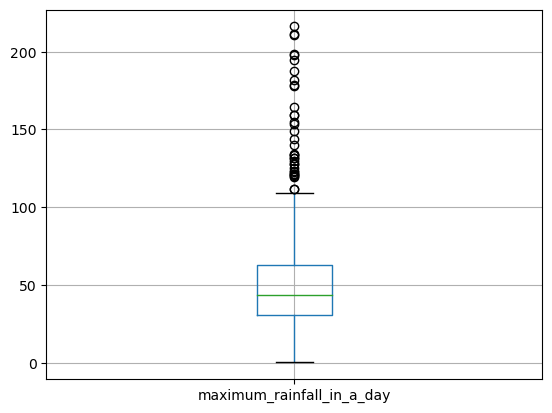

In [10]:
df_rainfall_maxdaily.boxplot()
# Observations: There are quite a number of outlier days with high rainfall

In [11]:
# Set month as index for merging later
df_rainfall_maxdaily.set_index('month', inplace=True)

In [12]:
df_rainfall_maxdaily

,maximum_rainfall_in_a_day
month,
1982-01,36.5
1982-02,9.4
1982-03,61.7
1982-04,45.1
1982-05,33.0
...,...
2022-07,27.8
2022-08,32.4
2022-09,38.2


In [13]:
# Print the first 5 rows of each data frame
df_rainfall_numdays.head()
# Observations: format of month is YYYY-MM, number of rainy days is whole numbers

,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


In [14]:
df_rainfall_numdays.tail()

,month,no_of_rainy_days
483,2022-04,18
484,2022-05,12
485,2022-06,17
486,2022-07,16
487,2022-08,15


In [15]:
df_rainfall_numdays.info()
# Observations: no null values
# No months skipped since there are 488 readings (1982-01 to 2022-08)
# Decision - may need to cut time period to common earlier deadline for merging

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   month             488 non-null    object
 1   no_of_rainy_days  488 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.8+ KB


In [16]:
df_rainfall_numdays.describe()

,no_of_rainy_days
count,488.000000
mean,14.061475
std,4.947394
min,1.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,27.000000


In [17]:
# Set month as index for merging later
df_rainfall_numdays.set_index('month', inplace=True)

In [18]:
# Print the first 5 rows of each data frame
df_rainfall_total.head()
# Observations: format of month is YYYY-MM, rainfall is to 1 d.p.

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


In [19]:
df_rainfall_total.tail()

,month,total_rainfall
483,2022-04,239.6
484,2022-05,102.0
485,2022-06,211.8
486,2022-07,145.2
487,2022-08,141.4


In [20]:
df_rainfall_total.info() 
# Observations: no null values
# No months skipped since there are 488 readings (1982-01 to 2022-08)
# Decision - may need to cut time period to common earlier deadline for merging

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           488 non-null    object 
 1   total_rainfall  488 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [21]:
df_rainfall_total.describe()
#Observations: Max is very high, to plot boxplot to check

,total_rainfall
count,488.000000
mean,177.163730
std,113.916029
min,0.200000
25%,93.850000
50%,159.450000
75%,238.075000
max,765.900000


<AxesSubplot: >

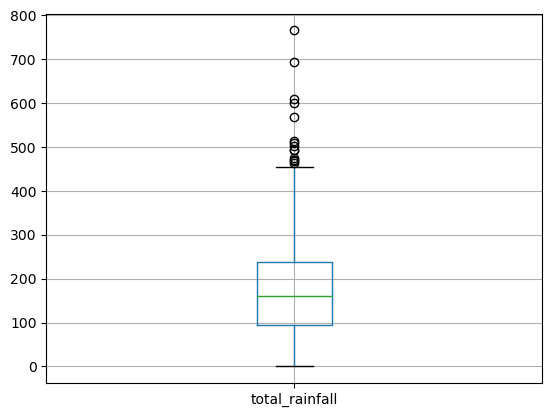

In [22]:
df_rainfall_total.boxplot()
# Observations: Some really high outliers, similar to the daily max

In [23]:
# Set month as index for merging later
df_rainfall_total.set_index('month', inplace=True)

In [24]:
# Print the first 5 rows of each data frame
df_sunshine_duration.head()
#Observations: format of month is YYYY-MM, sunshine is to 1 d.p.

,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


In [25]:
df_sunshine_duration.tail()

,month,mean_sunshine_hrs
486,2022-07,6.2
487,2022-08,5.5
488,2022-09,3.8
489,2022-10,3.5
490,2022-11,3.8


In [26]:
df_sunshine_duration.info() 
#Observations: no null values
# No months skipped since there are 491 readings (1982-01 to 2022-11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              491 non-null    object 
 1   mean_sunshine_hrs  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [27]:
df_sunshine_duration.describe()
# Observations: Looks ok

,mean_sunshine_hrs
count,491.000000
mean,5.676171
std,1.212024
min,2.700000
25%,4.800000
50%,5.600000
75%,6.450000
max,9.300000


In [28]:
# Set month as index for merging later
df_sunshine_duration.set_index('month', inplace=True)

In [29]:
# Print the fisrt rows of each data frame
df_temp_mean.head()
# Observations: format of month is YYYY-MM, temp is to 1 d.p.

,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [30]:
df_temp_mean.tail()

,month,mean_temp
486,2022-07,28.6
487,2022-08,28.1
488,2022-09,27.9
489,2022-10,27.6
490,2022-11,27.4


In [31]:
df_temp_mean.info()
# Observations: no null values
# No months skipped since there are 491 readings (1982-01 to 2022-11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   month      491 non-null    object 
 1   mean_temp  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [32]:
df_temp_mean.describe()
# Observations: Looks ok

,mean_temp
count,491.000000
mean,27.678615
std,0.799905
min,25.400000
25%,27.100000
50%,27.700000
75%,28.300000
max,29.500000


In [33]:
# Set month as index for merging later
df_temp_mean.set_index('month', inplace=True)

In [34]:
# Print the fisrt rows of each data frame
df_rh_mean.head()
# Observations: format of month is YYYY-MM, mean_rh is to 1 d.p.

,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


In [35]:
df_rh_mean.tail()

,month,mean_rh
486,2022-07,76.8
487,2022-08,77.4
488,2022-09,76.9
489,2022-10,78.7
490,2022-11,79.9


In [36]:
df_rh_mean.info()
# Observations: no null values
# No months skipped since there are 491 readings (1982-01 to 2022-11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    491 non-null    object 
 1   mean_rh  491 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [37]:
df_rh_mean.describe()
#Observations: Looks ok!

,mean_rh
count,491.000000
mean,82.224644
std,3.417366
min,72.000000
25%,79.900000
50%,82.600000
75%,84.650000
max,90.700000


In [38]:
# Set month as index for merging later
df_rh_mean.set_index('month', inplace=True)

In [39]:
# Print the fisrt rows of each data frame
df_wetbulb_hourly.head()
# Observations: format of date is YYYYY-MM-DD, format for time is 24hr, temp is to 1 d.p.
# Need to aggregate to monthly by mean and max

,wbt_date,wbt_time,wet_bulb_temperature
0,1982-01-01,1,24.7
1,1982-01-01,2,24.5
2,1982-01-01,3,24.3
3,1982-01-01,4,24.2
4,1982-01-01,5,24.2


In [40]:
df_wetbulb_hourly.tail()

,wbt_date,wbt_time,wet_bulb_temperature
358651,2022-11-30,20,23.6
358652,2022-11-30,21,23.6
358653,2022-11-30,22,23.9
358654,2022-11-30,23,23.2
358655,2022-11-30,24,23.6


In [41]:
df_wetbulb_hourly.info()
#Observations: no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358656 entries, 0 to 358655
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   wbt_date              358656 non-null  object 
 1   wbt_time              358656 non-null  int64  
 2   wet_bulb_temperature  358656 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.2+ MB


In [42]:
df_wetbulb_hourly.describe()
# Observations: Looks ok!

,wbt_time,wet_bulb_temperature
count,358656.000000,358656.000000
mean,12.499933,25.257366
std,6.922201,1.022259
min,0.000000,15.300000
25%,6.000000,24.600000
50%,12.000000,25.300000
75%,18.000000,26.000000
max,24.000000,29.300000


In [43]:
# Convert wet bulb hourly readings to mean and max for monthly
# Create year-month variable by dropping the last 3 characters from wbt_date
df_wetbulb_hourly['month'] = df_wetbulb_hourly['wbt_date'].map(lambda x: x[:-3])

In [44]:
# Aggregate and then rename columns
df_wetbulb = df_wetbulb_hourly.drop(columns=['wbt_date','wbt_time']).groupby('month').agg(['mean', 'max'])
df_wetbulb.columns = ['wbt_mean', 'wbt_max']
# round mean to 1 d.p. for consistency with other variables
df_wetbulb['wbt_mean'] = df_wetbulb['wbt_mean'].round(decimals=1)
# reset index to bring month variable up as a columns
df_wetbulb.reset_index(inplace=True)

In [45]:
# Check aggregation and renaming done correctly
df_wetbulb

,month,wbt_mean,wbt_max
0,1982-01,23.5,25.6
1,1982-02,24.3,26.8
2,1982-03,24.8,27.4
3,1982-04,25.1,27.6
4,1982-05,25.7,28.1
...,...,...,...
486,2022-07,25.4,27.4
487,2022-08,25.1,28.6
488,2022-09,24.8,27.3
489,2022-10,24.7,26.9


In [46]:
# Set month as index for merging later
df_wetbulb.set_index('month', inplace=True)

In [47]:
# Print the fisrt rows of each data frame
df_visitorship.head()
# Observations: format of month is YYYY MM
# Decision: To align the dates for the various data sets to begin from Dec 1990 and end at Aug 2022

,Month,Asian Civilisations Museum,National Museum Of Singapore,Singapore Art Museum,Singapore Philatelic Museum,Peranakan Museum,Science Centre Singapore,Jurong Birdpark,Night Safari,River Wonders,Singapore Zoological Gardens,Chinese/Japanese Gardens,Sun Yat Sen Nanyang Memorial Hall,Indian Heritage Centre,Malay Heritage Centre
0,1990-12,na,28.1,na,na,na,35.7,na,na,na,153.8,20.4,na,na,na
1,1991-01,na,19.1,na,na,na,20.2,na,na,na,62.6,13.3,na,na,na
2,1991-02,na,18.4,na,na,na,28.8,na,na,na,93.3,33.3,na,na,na
3,1991-03,na,27.4,na,na,na,61.5,na,na,na,95.5,14.9,na,na,na
4,1991-04,na,21.7,na,na,na,37.1,na,na,na,81.5,14.8,na,na,na


In [48]:
df_visitorship.tail()

,Month,Asian Civilisations Museum,National Museum Of Singapore,Singapore Art Museum,Singapore Philatelic Museum,Peranakan Museum,Science Centre Singapore,Jurong Birdpark,Night Safari,River Wonders,Singapore Zoological Gardens,Chinese/Japanese Gardens,Sun Yat Sen Nanyang Memorial Hall,Indian Heritage Centre,Malay Heritage Centre
380,2022-08,31.9,100.4,0,0,0,25.6,17.8,52.7,63.8,88.8,0.0,6,9.3,25.2
381,2022-09,32.4,62.8,0,0,0,35.3,24,52.2,60.7,94.0,0.0,12.2,11.6,22.8
382,2022-10,39.1,82.2,0,0,0,33.9,28.4,56.9,60.4,110.8,0.0,3.9,32.6,36.6
383,2022-11,32.7,73.0,0,0,0,29.8,44.3,44.9,57.4,88.1,0.0,2.8,9.9,0
384,2022-12,27.1,72.5,0,0,0,49.7,108.5,70.8,79.6,131.1,0.0,2.7,6.1,0


In [49]:
#Drop irrelevant rows
df_visitorship = df_visitorship[:381]

In [50]:
df_visitorship.tail()

,Month,Asian Civilisations Museum,National Museum Of Singapore,Singapore Art Museum,Singapore Philatelic Museum,Peranakan Museum,Science Centre Singapore,Jurong Birdpark,Night Safari,River Wonders,Singapore Zoological Gardens,Chinese/Japanese Gardens,Sun Yat Sen Nanyang Memorial Hall,Indian Heritage Centre,Malay Heritage Centre
376,2022-04,19.3,36.7,0,0,0,29.1,18.1,29.9,52.8,66.2,0.0,1.9,5.1,17.1
377,2022-05,23.6,51.8,0,0,0,38.8,20,40.3,67.7,92.6,0.0,3.7,8.5,23.3
378,2022-06,30,84.5,0,0,0,64.1,29.2,54.6,76.7,105.5,0.0,3.2,7.3,21
379,2022-07,31.9,84.2,0,0,0,32.5,23.3,59.1,65.5,101.2,0.0,3.4,10.6,25.5
380,2022-08,31.9,100.4,0,0,0,25.6,17.8,52.7,63.8,88.8,0.0,6,9.3,25.2


In [51]:
df_visitorship.info()
#Observations: no null values? 380 entries between Dec 1990 and Aug 2022

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Month                              381 non-null    object 
 1   Asian Civilisations Museum         381 non-null    object 
 2   National Museum Of Singapore       381 non-null    float64
 3   Singapore Art Museum               381 non-null    object 
 4   Singapore Philatelic Museum        381 non-null    object 
 5   Peranakan Museum                   381 non-null    object 
 6   Science Centre Singapore           381 non-null    float64
 7   Jurong Birdpark                    381 non-null    object 
 8   Night Safari                       381 non-null    object 
 9   River Wonders                      381 non-null    object 
 10  Singapore Zoological Gardens       381 non-null    float64
 11  Chinese/Japanese Gardens           381 non-null    float64

In [52]:
df_visitorship['Asian Civilisations Museum'].value_counts()
#Observations: there are 76 na values, to replace and convert

na      76
4.5      5
42.3     4
14.4     4
45.6     3
        ..
83.2     1
67.5     1
83.9     1
93       1
42.1     1
Name: Asian Civilisations Museum, Length: 234, dtype: int64

In [53]:
df_visitorship['Asian Civilisations Museum'] = df_visitorship['Asian Civilisations Museum'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [54]:
#Double Check 
df_visitorship['Asian Civilisations Museum'].value_counts()

4.5     5
14.4    4
42.3    4
5.6     3
45.6    3
       ..
76.8    1
53.8    1
63.5    1
58.7    1
42.1    1
Name: Asian Civilisations Museum, Length: 233, dtype: int64

In [55]:
df_visitorship['National Museum Of Singapore'].value_counts()
#Observations: no na values

27.2     4
18.9     4
24.7     4
84.3     3
60.7     3
        ..
7.2      1
6.3      1
6.6      1
9.0      1
100.4    1
Name: National Museum Of Singapore, Length: 303, dtype: int64

In [56]:
df_visitorship['Singapore Art Museum'].value_counts()
#Observations: there are 61 na values, to replace and convert

na      61
0       42
7.6      3
16.6     3
9.2      3
        ..
31.5     1
27.9     1
24.9     1
26.2     1
35       1
Name: Singapore Art Museum, Length: 235, dtype: int64

In [57]:
df_visitorship['Singapore Art Museum'] = df_visitorship['Singapore Art Museum'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [58]:
#Double Check 
df_visitorship['Singapore Art Museum'].value_counts()

0.0     42
12.8     3
7.6      3
16.6     3
9.2      3
        ..
35.3     1
31.5     1
27.9     1
24.9     1
27.8     1
Name: Singapore Art Museum, Length: 234, dtype: int64

In [59]:
df_visitorship['Singapore Philatelic Museum'].value_counts()
#Observations: there are 97 na values, to replace and convert

na      97
0       41
8.4      7
7.1      7
9        6
        ..
8.8      1
3.2      1
6.9      1
14.2     1
10.1     1
Name: Singapore Philatelic Museum, Length: 103, dtype: int64

In [60]:
df_visitorship['Singapore Philatelic Museum'] = df_visitorship['Singapore Philatelic Museum'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [61]:
#Double Check 
df_visitorship['Singapore Philatelic Museum'].value_counts()

0.0    41
8.4     7
7.1     7
9.3     6
9.0     6
       ..
2.3     1
8.8     1
4.3     1
9.2     1
2.6     1
Name: Singapore Philatelic Museum, Length: 102, dtype: int64

In [62]:
df_visitorship['Peranakan Museum'].value_counts()
#Observations: there are 208 na values, to replace and convert

na      208
0        41
18.3      4
17.9      3
14.7      2
       ... 
19.2      1
25.2      1
18.6      1
14.3      1
68.8      1
Name: Peranakan Museum, Length: 112, dtype: int64

In [63]:
df_visitorship['Peranakan Museum'] = df_visitorship['Peranakan Museum'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [64]:
#Double Check 
df_visitorship['Peranakan Museum'].value_counts()

0.0     41
18.3     4
17.9     3
18.8     2
39.1     2
        ..
19.2     1
25.2     1
18.6     1
14.3     1
68.8     1
Name: Peranakan Museum, Length: 111, dtype: int64

In [65]:
df_visitorship['Science Centre Singapore'] = df_visitorship['Science Centre Singapore'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [66]:
#Double Check 
df_visitorship['Science Centre Singapore'].value_counts()

31.5    3
40.9    3
68.2    3
32.6    3
40.4    3
       ..
45.7    1
60.1    1
43.8    1
47.4    1
38.8    1
Name: Science Centre Singapore, Length: 316, dtype: int64

In [67]:
df_visitorship['Jurong Birdpark'].value_counts()
#Observations: there are 121 na values, to replace and convert

na      121
58.5      4
59.9      3
70.3      3
54.7      3
       ... 
48.4      1
60.7      1
82.2      1
45        1
17.8      1
Name: Jurong Birdpark, Length: 206, dtype: int64

In [68]:
df_visitorship['Jurong Birdpark'] = df_visitorship['Jurong Birdpark'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [69]:
#Double Check 
df_visitorship['Jurong Birdpark'].value_counts()

58.5    4
70.3    3
54.7    3
59.9    3
58.3    3
       ..
48.4    1
60.7    1
82.2    1
45.0    1
17.8    1
Name: Jurong Birdpark, Length: 205, dtype: int64

In [70]:
df_visitorship['Night Safari'].value_counts()
#Observations: there are 121 na values, to replace and convert

na       121
92         3
109.6      3
91.1       2
98.7       2
        ... 
115.3      1
102.6      1
85         1
92.4       1
59.1       1
Name: Night Safari, Length: 225, dtype: int64

In [71]:
df_visitorship['Night Safari'] = df_visitorship['Night Safari'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [72]:
#Double Check 
df_visitorship['Night Safari'].value_counts()

92.0     3
109.6    3
52.7     2
141.1    2
108.3    2
        ..
102.6    1
85.0     1
92.4     1
93.0     1
59.1     1
Name: Night Safari, Length: 224, dtype: int64

In [73]:
df_visitorship['River Wonders'].value_counts()
#Observations: there are 268 na values, to replace and convert

na      268
75        3
74.4      2
0         2
60.6      2
       ... 
59.4      1
54.7      1
56.3      1
82.8      1
63.8      1
Name: River Wonders, Length: 106, dtype: int64

In [74]:
df_visitorship['River Wonders'] = df_visitorship['River Wonders'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [75]:
#Double Check 
df_visitorship['River Wonders'].value_counts()

75.0    3
0.0     2
60.6    2
74.4    2
65.5    2
       ..
90.3    1
59.4    1
54.7    1
56.3    1
63.8    1
Name: River Wonders, Length: 105, dtype: int64

In [76]:
df_visitorship['Singapore Zoological Gardens'].value_counts()
#Observations: No na values

125.8    4
127.4    3
153.0    3
103.6    3
134.9    2
        ..
123.6    1
117.1    1
81.8     1
145.2    1
88.8     1
Name: Singapore Zoological Gardens, Length: 332, dtype: int64

In [77]:
df_visitorship['Chinese/Japanese Gardens'].value_counts()
#Observations: No na values

0.0     39
33.3     4
8.8      4
7.8      4
8.4      3
        ..
51.9     1
47.5     1
32.0     1
36.2     1
52.0     1
Name: Chinese/Japanese Gardens, Length: 282, dtype: int64

In [78]:
df_visitorship['Sun Yat Sen Nanyang Memorial Hall'].value_counts()
#Observations: there are 277 na values, to replace and convert

na      277
6.2       4
7.7       4
8.8       3
0         3
       ... 
10.5      1
14        1
33        1
16.9      1
6         1
Name: Sun Yat Sen Nanyang Memorial Hall, Length: 79, dtype: int64

In [79]:
df_visitorship['Sun Yat Sen Nanyang Memorial Hall'] = df_visitorship['Sun Yat Sen Nanyang Memorial Hall'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [80]:
#Double Check 
df_visitorship['Sun Yat Sen Nanyang Memorial Hall'].value_counts()

6.2     4
7.7     4
8.8     3
0.0     3
4.1     2
       ..
13.6    1
8.1     1
33.0    1
16.9    1
6.0     1
Name: Sun Yat Sen Nanyang Memorial Hall, Length: 78, dtype: int64

In [81]:
df_visitorship['Indian Heritage Centre'].value_counts()
#Observations: there are 293 na values, to replace and convert

na      293
0         3
12.7      2
16.7      2
7.3       2
       ... 
19.6      1
43.4      1
12        1
27.3      1
9.3       1
Name: Indian Heritage Centre, Length: 73, dtype: int64

In [82]:
df_visitorship['Indian Heritage Centre'] = df_visitorship['Indian Heritage Centre'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [83]:
#Double Check 
df_visitorship['Indian Heritage Centre'].value_counts()

0.0     3
9.4     2
7.3     2
17.5    2
18.8    2
       ..
19.6    1
30.7    1
27.3    1
13.8    1
9.3     1
Name: Indian Heritage Centre, Length: 72, dtype: int64

In [84]:
df_visitorship['Malay Heritage Centre'].value_counts()
#Observations: there are 277 na values, to replace and convert

na      277
15.4      3
0         3
4.5       2
59.2      2
       ... 
37.8      1
50.4      1
55        1
43.4      1
25.2      1
Name: Malay Heritage Centre, Length: 92, dtype: int64

In [85]:
df_visitorship['Malay Heritage Centre'] = df_visitorship['Malay Heritage Centre'].map(lambda x: np.nan if x == 'na' else x).astype(float)

In [86]:
#Double Check 
df_visitorship['Malay Heritage Centre'].value_counts()

0.0     3
15.4    3
9.1     2
8.0     2
43.1    2
       ..
37.8    1
50.4    1
55.0    1
43.4    1
25.2    1
Name: Malay Heritage Centre, Length: 91, dtype: int64

In [87]:
# Double check info
df_visitorship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Month                              381 non-null    object 
 1   Asian Civilisations Museum         305 non-null    float64
 2   National Museum Of Singapore       381 non-null    float64
 3   Singapore Art Museum               320 non-null    float64
 4   Singapore Philatelic Museum        284 non-null    float64
 5   Peranakan Museum                   173 non-null    float64
 6   Science Centre Singapore           381 non-null    float64
 7   Jurong Birdpark                    260 non-null    float64
 8   Night Safari                       260 non-null    float64
 9   River Wonders                      113 non-null    float64
 10  Singapore Zoological Gardens       381 non-null    float64
 11  Chinese/Japanese Gardens           381 non-null    float64

In [88]:
df_visitorship.tail()

,Month,Asian Civilisations Museum,National Museum Of Singapore,Singapore Art Museum,Singapore Philatelic Museum,Peranakan Museum,Science Centre Singapore,Jurong Birdpark,Night Safari,River Wonders,Singapore Zoological Gardens,Chinese/Japanese Gardens,Sun Yat Sen Nanyang Memorial Hall,Indian Heritage Centre,Malay Heritage Centre
376,2022-04,19.3,36.7,0.0,0.0,0.0,29.1,18.1,29.9,52.8,66.2,0.0,1.9,5.1,17.1
377,2022-05,23.6,51.8,0.0,0.0,0.0,38.8,20.0,40.3,67.7,92.6,0.0,3.7,8.5,23.3
378,2022-06,30.0,84.5,0.0,0.0,0.0,64.1,29.2,54.6,76.7,105.5,0.0,3.2,7.3,21.0
379,2022-07,31.9,84.2,0.0,0.0,0.0,32.5,23.3,59.1,65.5,101.2,0.0,3.4,10.6,25.5
380,2022-08,31.9,100.4,0.0,0.0,0.0,25.6,17.8,52.7,63.8,88.8,0.0,6.0,9.3,25.2


In [89]:
#Rename columns to consistent naming
df_visitorship.columns = ['month','asian_civilisations_museum','national_museum_of_singapore','singapore_art_museum','singapore_philatelic_museum','peranakan_museum','science_centre_singapore','jurong_birdpark','night_safari','river_wonders','zoo','chinese/japanese_garden','sun_yat_sen_nanyang_memorial_hall','indian_heritage_centre','malay_heritage_centre']

In [90]:
df_visitorship

,month,asian_civilisations_museum,national_museum_of_singapore,singapore_art_museum,singapore_philatelic_museum,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
0,1990-12,NaN,28.1,NaN,NaN,NaN,35.7,NaN,NaN,NaN,153.8,20.4,NaN,NaN,NaN
1,1991-01,NaN,19.1,NaN,NaN,NaN,20.2,NaN,NaN,NaN,62.6,13.3,NaN,NaN,NaN
2,1991-02,NaN,18.4,NaN,NaN,NaN,28.8,NaN,NaN,NaN,93.3,33.3,NaN,NaN,NaN
3,1991-03,NaN,27.4,NaN,NaN,NaN,61.5,NaN,NaN,NaN,95.5,14.9,NaN,NaN,NaN
4,1991-04,NaN,21.7,NaN,NaN,NaN,37.1,NaN,NaN,NaN,81.5,14.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,2022-04,19.3,36.7,0.0,0.0,0.0,29.1,18.1,29.9,52.8,66.2,0.0,1.9,5.1,17.1
377,2022-05,23.6,51.8,0.0,0.0,0.0,38.8,20.0,40.3,67.7,92.6,0.0,3.7,8.5,23.3
378,2022-06,30.0,84.5,0.0,0.0,0.0,64.1,29.2,54.6,76.7,105.5,0.0,3.2,7.3,21.0
379,2022-07,31.9,84.2,0.0,0.0,0.0,32.5,23.3,59.1,65.5,101.2,0.0,3.4,10.6,25.5


In [91]:
df_visitorship.describe()

,asian_civilisations_museum,national_museum_of_singapore,singapore_art_museum,singapore_philatelic_museum,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
count,305.000000,381.000000,320.000000,284.000000,173.000000,381.00000,260.000000,260.000000,113.000000,381.000000,381.000000,104.000000,88.000000,104.000000
mean,31.873443,43.701312,29.800625,7.008099,21.344509,59.90315,63.756538,82.880000,70.788496,123.428871,43.627034,11.041346,12.925000,35.849038
std,21.938853,32.529529,26.135850,5.193449,18.040237,31.08227,21.779151,29.406842,25.486732,35.954081,38.853455,7.462640,8.648198,23.702022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,19.000000,9.200000,3.400000,12.500000,36.90000,56.400000,68.750000,56.600000,100.700000,10.200000,6.200000,6.700000,11.975000
50%,32.800000,30.200000,23.650000,7.400000,19.400000,55.80000,66.600000,87.300000,71.100000,124.800000,36.200000,8.800000,12.300000,38.000000
75%,46.400000,66.600000,48.475000,9.400000,30.600000,78.90000,78.050000,101.825000,86.100000,144.500000,68.000000,13.925000,17.400000,56.250000
max,113.900000,194.700000,143.500000,41.100000,122.900000,191.40000,147.700000,158.300000,168.700000,250.400000,218.900000,35.600000,43.400000,81.000000


In [92]:
# Set month as index for merging later
df_visitorship.set_index('month', inplace=True)

###### Data Merging

In [93]:
# Merge data by date, subset time period from Dec 1990 (earliest attendance data)
# to Aug 2022, for completeness of data
df_merged = df_rainfall_maxdaily.join([df_rainfall_numdays,
                                       df_rainfall_total,
                                       df_sunshine_duration,
                                       df_temp_mean,
                                       df_rh_mean,
                                       df_wetbulb,
                                       df_visitorship])

In [94]:
# Convert datetime string to datetime variable for easier manipulation
df_merged.index = pd.to_datetime(df_merged.index)

In [95]:
# Subset time period from Dec 1990 to Aug 2022
df_merged_sub = df_merged['1990-12-01':'2022-08-31']

In [96]:
df_merged_sub 

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
month,,,,,,,,,,,,,,,,,,,,,
1990-12-01,33.5,16.0,201.1,5.5,26.3,86.0,24.5,26.8,NaN,28.1,...,NaN,35.7,NaN,NaN,NaN,153.8,20.4,NaN,NaN,NaN
1991-01-01,36.2,13.0,123.9,5.6,26.7,84.1,24.6,26.4,NaN,19.1,...,NaN,20.2,NaN,NaN,NaN,62.6,13.3,NaN,NaN,NaN
1991-02-01,17.9,7.0,45.5,7.0,27.1,81.6,24.6,26.9,NaN,18.4,...,NaN,28.8,NaN,NaN,NaN,93.3,33.3,NaN,NaN,NaN
1991-03-01,48.6,10.0,92.4,7.1,27.8,79.9,25.0,27.2,NaN,27.4,...,NaN,61.5,NaN,NaN,NaN,95.5,14.9,NaN,NaN,NaN
1991-04-01,32.2,13.0,134.2,5.8,27.7,84.3,25.6,27.7,NaN,21.7,...,NaN,37.1,NaN,NaN,NaN,81.5,14.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,58.8,18.0,239.6,5.2,28.1,80.0,25.4,27.6,19.3,36.7,...,0.0,29.1,18.1,29.9,52.8,66.2,0.0,1.9,5.1,17.1
2022-05-01,44.6,12.0,102.0,6.7,29.2,76.5,25.9,27.8,23.6,51.8,...,0.0,38.8,20.0,40.3,67.7,92.6,0.0,3.7,8.5,23.3
2022-06-01,59.4,17.0,211.8,4.7,27.9,79.1,25.1,27.0,30.0,84.5,...,0.0,64.1,29.2,54.6,76.7,105.5,0.0,3.2,7.3,21.0


In [97]:
# Rename 'month' variable as 'yrmth' in dataframe to avoid ambiguity
df_merged_sub.index.names = ['yrmth']
# Create year and month variables
df_merged_sub['year'] = df_merged_sub.index.year.astype('category')
df_merged_sub['month'] = df_merged_sub.index.month.astype('category')

/var/folders/qd/bsjdfyz95kd_gl4thk_2jhx80000gn/T/ipykernel_12282/3012394488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_sub['year'] = df_merged_sub.index.year.astype('category')
/var/folders/qd/bsjdfyz95kd_gl4thk_2jhx80000gn/T/ipykernel_12282/3012394488.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_sub['month'] = df_merged_sub.index.month.astype('category')


In [98]:
# Check merged dataset
df_merged_sub
# Observations: Looks ok

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre,year,month
yrmth,,,,,,,,,,,,,,,,,,,,,
1990-12-01,33.5,16.0,201.1,5.5,26.3,86.0,24.5,26.8,NaN,28.1,...,NaN,NaN,NaN,153.8,20.4,NaN,NaN,NaN,1990,12
1991-01-01,36.2,13.0,123.9,5.6,26.7,84.1,24.6,26.4,NaN,19.1,...,NaN,NaN,NaN,62.6,13.3,NaN,NaN,NaN,1991,1
1991-02-01,17.9,7.0,45.5,7.0,27.1,81.6,24.6,26.9,NaN,18.4,...,NaN,NaN,NaN,93.3,33.3,NaN,NaN,NaN,1991,2
1991-03-01,48.6,10.0,92.4,7.1,27.8,79.9,25.0,27.2,NaN,27.4,...,NaN,NaN,NaN,95.5,14.9,NaN,NaN,NaN,1991,3
1991-04-01,32.2,13.0,134.2,5.8,27.7,84.3,25.6,27.7,NaN,21.7,...,NaN,NaN,NaN,81.5,14.8,NaN,NaN,NaN,1991,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,58.8,18.0,239.6,5.2,28.1,80.0,25.4,27.6,19.3,36.7,...,18.1,29.9,52.8,66.2,0.0,1.9,5.1,17.1,2022,4
2022-05-01,44.6,12.0,102.0,6.7,29.2,76.5,25.9,27.8,23.6,51.8,...,20.0,40.3,67.7,92.6,0.0,3.7,8.5,23.3,2022,5
2022-06-01,59.4,17.0,211.8,4.7,27.9,79.1,25.1,27.0,30.0,84.5,...,29.2,54.6,76.7,105.5,0.0,3.2,7.3,21.0,2022,6


In [99]:
df_merged_sub.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 381 entries, 1990-12-01 to 2022-08-01
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   maximum_rainfall_in_a_day          381 non-null    float64 
 1   no_of_rainy_days                   381 non-null    float64 
 2   total_rainfall                     381 non-null    float64 
 3   mean_sunshine_hrs                  381 non-null    float64 
 4   mean_temp                          381 non-null    float64 
 5   mean_rh                            381 non-null    float64 
 6   wbt_mean                           381 non-null    float64 
 7   wbt_max                            381 non-null    float64 
 8   asian_civilisations_museum         305 non-null    float64 
 9   national_museum_of_singapore       381 non-null    float64 
 10  singapore_art_museum               320 non-null    float64 
 11  singapore_philatelic_museu


## Data Dictionary



|Feature|Type|Dataset|Description|
|---|---|---|---|
|**yrmth**|*string*|monthly weather attendance|The year and month of each data point (in YYYY-MM format).| 
|**maximum_rainfall_in_a_day**|*float*|monthly weather attendance|The maximum amount of rainfall within a day for the specific yrmth (units mm).|
|**no_of_rainy_days**|*float*|monthly weather attendance|The number of rainy days in the specific yrmth. A day is considered rainy if more than 0.2mm of rain fell.| 
|**total_rainfall**|*float*|monthly weather attendance|The total rainfall in the specific yrmth (units mm).| 
|**mean_sunshine_hrs**|*float*|monthly weather attendance|The mean hours of sunshine per day in the specific yrmth (units h).| 
|**mean_temp**|*float*|monthly weather attendance|The mean of the daily mean air temperature in the specific yrmth (units degree Celsius).| 
|**mean_rh**|*float*|monthly weather attendance|The mean of the daily relative humidity in the specific yrmth (units percentage).| 
|**wbt_mean**|*float*|monthly weather attendance|The mean of the daily mean wet-bulb temperature in the specific yrmth (units degree Celsius).| 
|**wbt_max**|*float*|monthly weather attendance|The mean of the daily maximum wet-bulb temperature in the specific yrmth (units degree Celsius).| 
|**asian_civilisations_museum**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the asian civilisations museum in the specific yrmth.| 
|**national_museum_of_singapore**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the national museum of singapore in the specific yrmth.| 
|**singapore_art_museum**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the singapore art museum in the specific yrmth.| 
|**peranakan_museum**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the peranakan museum in the specific yrmth.| 
|**science_centre_singapore**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the science centre singapore in the specific yrmth.| 
|**jurong_birdpark**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the jurong birdpark in the specific yrmth.| 
|**night_safari**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the night safari in the specific yrmth.|
|**river_wonders**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the river wonders in the specific yrmth.|
|**zoo**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the zoo in the specific yrmth.|
|**chinese/japanese_garden**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the chinese/japanese_garden in the specific yrmth.|
|**sun_yat_sen_nanyang_memorial_hall**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the sun yat sen nanyang memorial hall in the specific yrmth.|
|**indian_heritage_centre**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the indian heritage centre in the specific yrmth.|
|**malay_heritage_centre**|*float*|monthly weather attendance|The total number of visitors (in thousands) to the malay heritage centre in the specific yrmth.|
|**year**|*int*|monthly weather attendance|The year of the specific yrmth.| 
|**month**|*int*|monthly weather attendance|The month of the specific yrmth.| 


## Data Export

In [100]:
# Save merged dataset
df_merged_sub.to_csv('../data/Monthly Weather Attendance Dataset.csv')

## Exploratory Data Analysis

The next section of the notebook covers the following areas: 
1. Summary Statistics.
2. The use of a **dictionary comprehension** to apply the standard deviation function created in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'rainfall-monthly-total': xxx, 'no_of_rainy_days': xxx, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which month have the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest total rainfall in the date range of analysis?
        - Which month have the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
        - Which year have the highest and lowest number of rainy days in the date range of analysis?
        - Are there any outliers months in the dataset?
       

In [101]:
#Import merged dataset
df = pd.read_csv('../data/Monthly Weather Attendance Dataset.csv')

In [102]:
# Set index variable and convert to datetime for easier indexing
df['yrmth'] = pd.to_datetime(df['yrmth'])
df.set_index('yrmth', inplace=True)

In [103]:
# Set month and year variables as category dtype for easier analysis
df['month'] = df['month'].astype('category')
df['year'] = df['year'].astype('category')

In [104]:
#Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 381 entries, 1990-12-01 to 2022-08-01
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   maximum_rainfall_in_a_day          381 non-null    float64 
 1   no_of_rainy_days                   381 non-null    float64 
 2   total_rainfall                     381 non-null    float64 
 3   mean_sunshine_hrs                  381 non-null    float64 
 4   mean_temp                          381 non-null    float64 
 5   mean_rh                            381 non-null    float64 
 6   wbt_mean                           381 non-null    float64 
 7   wbt_max                            381 non-null    float64 
 8   asian_civilisations_museum         305 non-null    float64 
 9   national_museum_of_singapore       381 non-null    float64 
 10  singapore_art_museum               320 non-null    float64 
 11  singapore_philatelic_museu

In [105]:
## Summary Statistics of variables
df.describe()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,305.000000,381.000000,...,173.000000,381.00000,260.000000,260.000000,113.000000,381.000000,381.000000,104.000000,88.000000,104.000000
mean,52.015223,14.220472,177.654856,5.706562,27.800787,82.006037,25.339370,27.533071,31.873443,43.701312,...,21.344509,59.90315,63.756538,82.880000,70.788496,123.428871,43.627034,11.041346,12.925000,35.849038
std,34.873320,5.023492,113.358076,1.198655,0.763113,3.600393,0.570986,0.595207,21.938853,32.529529,...,18.040237,31.08227,21.779151,29.406842,25.486732,35.954081,38.853455,7.462640,8.648198,23.702022
min,0.200000,1.000000,0.200000,3.000000,25.500000,72.000000,23.400000,25.800000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.100000,11.000000,93.400000,4.800000,27.300000,79.700000,25.000000,27.100000,12.000000,19.000000,...,12.500000,36.90000,56.400000,68.750000,56.600000,100.700000,10.200000,6.200000,6.700000,11.975000
50%,43.800000,14.000000,161.000000,5.700000,27.900000,82.400000,25.400000,27.500000,32.800000,30.200000,...,19.400000,55.80000,66.600000,87.300000,71.100000,124.800000,36.200000,8.800000,12.300000,38.000000
75%,62.400000,18.000000,239.600000,6.500000,28.300000,84.800000,25.700000,28.000000,46.400000,66.600000,...,30.600000,78.90000,78.050000,101.825000,86.100000,144.500000,68.000000,13.925000,17.400000,56.250000
max,216.200000,27.000000,765.900000,9.200000,29.500000,90.700000,26.900000,29.300000,113.900000,194.700000,...,122.900000,191.40000,147.700000,158.300000,168.700000,250.400000,218.900000,35.600000,43.400000,81.000000


In [106]:
# Generate standard deviations for numeric variables (i.e. exclude last 2 columns) from coding challenge functions
sd = {col:get_sd(list(df[col].values)) for col in df.iloc[:,:-2]}
sd
#Observation: # Getsd function is working correctly as the values obtained are similar with the summary stats.

{'maximum_rainfall_in_a_day': 34.827524476636306,
 'no_of_rainy_days': 5.016895421653983,
 'total_rainfall': 113.2092147682499,
 'mean_sunshine_hrs': 1.19708043329632,
 'mean_temp': 0.7621109028827251,
 'mean_rh': 3.5956652655749046,
 'wbt_mean': 0.5702360537575463,
 'wbt_max': 0.5944257845607761,
 'asian_civilisations_museum': 21.902858177531726,
 'national_museum_of_singapore': 32.486810945626566,
 'singapore_art_museum': 26.094980352730214,
 'singapore_philatelic_museum': 5.184297585504557,
 'peranakan_museum': 17.988022232411772,
 'science_centre_singapore': 31.041452947689184,
 'jurong_birdpark': 21.737227804693404,
 'night_safari': 29.350236272145565,
 'river_wonders': 25.373708615162045,
 'zoo': 35.90686634833529,
 'chinese/japanese_garden': 38.802432871089074,
 'sun_yat_sen_nanyang_memorial_hall': 7.4266750322081325,
 'indian_heritage_centre': 8.598919726020558,
 'malay_heritage_centre': 23.58779424908107}

#### Observations from the Summary Statistics:
- Rainfall variables: Rainfall vary significantly, from months with only 1 rainy day and less than 0.2mm of rain to months with rain almost every day and close to 800mm of rain. 

- Sunshine variable: Number of hours of sunshine has a much smaller standard deviation which is not unexpected, given that max number of sunshine hours less than 12h.

- Temperature variables: Ranges of mean air temperatures are similar to those of wet-bulb temperatures. 

- Humidity variable: Average humidity of 82% indicates high relative humidity, and small standard deviation observed.

- Attendance: Attendance data available for the various places of interest differs with the highest of last 381 months, i.e. from Dec 1990 onwards, for the older institutions. attendance figures are shown in thousands and have a relatively high standard deviation across institutions. The very large range for various institutions also suggests some outliers.

In [107]:
# See trends for total rainfall and rainy days in 1991, 2001, 2011 and 2021 -Changed the years as attractions were closed in 2020 due to the Covid-19 pandemic.

print('----------')
for year in [1991,2001,2011,2021]:
    print(f'### Statistics for {year} ###')
    # month with highest total rainfall
    print('Month with highest total rainfall:')
    print(df[df['year'] == year].sort_values(by='total_rainfall', ascending=False).head(1)['total_rainfall'])

    # month with lowest total rainfall
    print('Month with lowest total rainfall:')
    print(df[df['year'] == year].sort_values(by='total_rainfall', ascending=True).head(1)['total_rainfall'])

    # month with highest number of rainy days
    print('Month with highest number of rainy days:')
    print(df[df['year'] == year].sort_values(by='no_of_rainy_days', ascending=False).head(1)['no_of_rainy_days'])

    # month with lowest number of rainy days
    print('Month with lowest number of rainy days:')
    print(df[df['year'] == year].sort_values(by='no_of_rainy_days', ascending=True).head(1)['no_of_rainy_days'])

    print('\n')
    
print('----------')    

# year with highest total rainfall
print('Year with highest total rainfall:')
print(df.groupby('year').sum().sort_values(by='total_rainfall', ascending=False).head(1)['total_rainfall'])

# year with lowest total rainfall
print('Year with lowest total rainfall:')
print(df.groupby('year').sum().sort_values(by='total_rainfall', ascending=True).head(1)['total_rainfall'])

# year with highest number of rainy days
print('Year with highest number of rainy days:')
print(df.groupby('year').sum().sort_values(by='no_of_rainy_days', ascending=False).head(1)['no_of_rainy_days'])

# year with lowest number of rainy days
print('Year with lowest number of rainy days:')
print(df.groupby('year').sum().sort_values(by='no_of_rainy_days', ascending=True).head(1)['no_of_rainy_days'])


----------
### Statistics for 1991 ###
Month with highest total rainfall:
yrmth
1991-12-01    492.3
Name: total_rainfall, dtype: float64
Month with lowest total rainfall:
yrmth
1991-07-01    37.3
Name: total_rainfall, dtype: float64
Month with highest number of rainy days:
yrmth
1991-05-01    23.0
Name: no_of_rainy_days, dtype: float64
Month with lowest number of rainy days:
yrmth
1991-10-01    5.0
Name: no_of_rainy_days, dtype: float64


### Statistics for 2001 ###
Month with highest total rainfall:
yrmth
2001-12-01    609.0
Name: total_rainfall, dtype: float64
Month with lowest total rainfall:
yrmth
2001-02-01    86.6
Name: total_rainfall, dtype: float64
Month with highest number of rainy days:
yrmth
2001-01-01    21.0
Name: no_of_rainy_days, dtype: float64
Month with lowest number of rainy days:
yrmth
2001-07-01    9.0
Name: no_of_rainy_days, dtype: float64


### Statistics for 2011 ###
Month with highest total rainfall:
yrmth
2011-01-01    513.2
Name: total_rainfall, dtype: float64

In [108]:
# Outlier months by total rainfall (defined as more than 3 std away from mean)
df[(df['total_rainfall'] > df['total_rainfall'].mean() + 3 * df['total_rainfall'].std()) |
(df['total_rainfall'] < df['total_rainfall'].mean() - 3 * df['total_rainfall'].std())]

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre,year,month
yrmth,,,,,,,,,,,,,,,,,,,,,
2001-12-01,211.1,20.0,609.0,4.5,26.7,86.8,24.9,27.4,6.0,18.3,...,91.6,75.8,NaN,162.7,47.3,NaN,NaN,NaN,2001,12
2004-01-01,177.8,13.0,600.9,6.7,26.9,86.7,25.1,27.3,13.8,4.1,...,58.3,57.4,NaN,75.9,31.8,NaN,NaN,NaN,2004,1
2006-12-01,198.0,22.0,765.9,3.2,26.6,88.5,25.1,27.9,35.9,83.5,...,90.2,89.7,NaN,145.9,49.5,NaN,NaN,NaN,2006,12
2021-01-01,210.6,17.0,692.8,4.2,26.0,82.6,23.7,26.0,19.4,22.9,...,90.3,22.4,41.0,54.7,0.0,13.0,8.0,7.0,2021,1


In [109]:
#Observations: Overall, there are 4 outlier months when total rainfall is more than 3 standard deviations from mean.

In [110]:
# Outlier months by number of rainy days (defined as more than 3 std away from mean)
df[(df['no_of_rainy_days'] > df['no_of_rainy_days'].mean() + 3 * df['no_of_rainy_days'].std()) |
(df['no_of_rainy_days'] < df['no_of_rainy_days'].mean() - 3 * df['no_of_rainy_days'].std())]

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre,year,month
yrmth,,,,,,,,,,,,,,,,,,,,,


In [111]:
#Observations: Overall, there are no outlier months for number of rain days.

---

#### INDOOR ATTRACTIONS

In [112]:
# Which month had highest attendance for the asian civilisations museum:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='asian_civilisations_museum', ascending=False).head()
# Observations: Mar and Oct have the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
3,44.212500,12.43750,152.987500,6.378125,27.846875,81.475000,25.268750,27.606250,37.192000,42.381250,...,21.957143,64.512500,58.063636,82.450000,69.377778,125.096875,41.043750,7.833333,11.9000,35.500000
10,47.383871,15.00000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228000,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.1000,37.575000
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.087500,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.6000,39.811111
5,44.884375,14.37500,164.896875,5.981250,28.634375,82.053125,26.146875,28.228125,34.411538,43.406250,...,19.426667,63.309375,68.890909,81.972727,62.340000,125.803125,39.128125,8.433333,13.7875,35.122222
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.7500,41.488889


In [113]:
# Which month had highest attendance for the national museum of singapore:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='national_museum_of_singapore', ascending=False).head()
# Observations: August has the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.087500,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.600000,39.811111
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889
11,71.287097,19.16129,254.270968,4.451613,27.238710,84.751613,25.174194,27.467742,30.636000,45.741935,...,20.492857,75.516129,60.919048,68.085714,64.322222,122.758065,34.800000,13.637500,12.671429,35.950000
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.250000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000
10,47.383871,15.00000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228000,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.100000,37.575000


In [114]:
# Which month had highest attendance for the singapore art museum:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='singapore_art_museum', ascending=False).head()
# Observations: August has the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.087500,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.6000,39.811111
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.7500,41.488889
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.250000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.2500,36.100000
5,44.884375,14.37500,164.896875,5.981250,28.634375,82.053125,26.146875,28.228125,34.411538,43.406250,...,19.426667,63.309375,68.890909,81.972727,62.340000,125.803125,39.128125,8.433333,13.7875,35.122222
10,47.383871,15.00000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228000,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.1000,37.575000


In [115]:
# Which month had highest attendance for the singapore philatelic museum:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='singapore_philatelic_museum', ascending=False).head()
# Observations: August has the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.087500,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.600000,39.811111
11,71.287097,19.16129,254.270968,4.451613,27.238710,84.751613,25.174194,27.467742,30.636000,45.741935,...,20.492857,75.516129,60.919048,68.085714,64.322222,122.758065,34.800000,13.637500,12.671429,35.950000
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889
12,78.881250,19.03125,321.165625,4.365625,26.806250,85.290625,24.850000,27.303125,27.980000,43.043750,...,18.478571,80.600000,76.947619,94.147619,107.022222,160.834375,35.012500,8.925000,9.142857,35.750000
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.250000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000


In [116]:
# Which month had highest attendance for the peranakan museum:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='peranakan_museum', ascending=False).head()
# Observations: August has the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.087500,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.600000,39.811111
3,44.212500,12.43750,152.987500,6.378125,27.846875,81.475000,25.268750,27.606250,37.192000,42.381250,...,21.957143,64.512500,58.063636,82.450000,69.377778,125.096875,41.043750,7.833333,11.900000,35.500000
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889
11,71.287097,19.16129,254.270968,4.451613,27.238710,84.751613,25.174194,27.467742,30.636000,45.741935,...,20.492857,75.516129,60.919048,68.085714,64.322222,122.758065,34.800000,13.637500,12.671429,35.950000
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.250000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000


In [117]:
# Which month had highest attendance for the science centre singapore:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='science_centre_singapore', ascending=False).head()
# Observations: December and November have the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
12,78.881250,19.03125,321.165625,4.365625,26.806250,85.290625,24.850000,27.303125,27.980000,43.043750,...,18.478571,80.600000,76.947619,94.147619,107.022222,160.834375,35.012500,8.925000,9.142857,35.750000
11,71.287097,19.16129,254.270968,4.451613,27.238710,84.751613,25.174194,27.467742,30.636000,45.741935,...,20.492857,75.516129,60.919048,68.085714,64.322222,122.758065,34.800000,13.637500,12.671429,35.950000
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.250000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000
3,44.212500,12.43750,152.987500,6.378125,27.846875,81.475000,25.268750,27.606250,37.192000,42.381250,...,21.957143,64.512500,58.063636,82.450000,69.377778,125.096875,41.043750,7.833333,11.900000,35.500000
5,44.884375,14.37500,164.896875,5.981250,28.634375,82.053125,26.146875,28.228125,34.411538,43.406250,...,19.426667,63.309375,68.890909,81.972727,62.340000,125.803125,39.128125,8.433333,13.787500,35.122222


In [118]:
# Which month had highest attendance for the sun yat sen nanyang memorial hall:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='sun_yat_sen_nanyang_memorial_hall', ascending=False).head()
# Observations: September the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
9,38.651613,12.548387,127.454839,5.412903,28.019355,80.596774,25.370968,27.454839,30.092,38.970968,...,19.285714,52.000000,58.395238,69.714286,62.666667,111.783871,101.393548,20.425000,14.971429,28.937500
2,37.234375,8.562500,104.043750,7.028125,27.325000,80.912500,24.721875,26.993750,28.672,38.115625,...,18.907143,47.515625,52.850000,74.522727,60.755556,107.493750,43.831250,17.388889,9.342857,35.566667
11,71.287097,19.161290,254.270968,4.451613,27.238710,84.751613,25.174194,27.467742,30.636,45.741935,...,20.492857,75.516129,60.919048,68.085714,64.322222,122.758065,34.800000,13.637500,12.671429,35.950000
10,47.383871,15.000000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.100000,37.575000
1,80.259375,13.375000,232.478125,5.840625,26.837500,83.309375,24.596875,26.915625,28.888,38.740625,...,18.257143,44.662500,61.636364,81.663636,65.711111,104.068750,36.084375,11.766667,16.185714,38.166667


In [119]:
# Which month had highest attendance for the indian heritage centre:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='indian_heritage_centre', ascending=False).head()
# Observations: October the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
10,47.383871,15.000000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228000,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.100000,37.575000
1,80.259375,13.375000,232.478125,5.840625,26.837500,83.309375,24.596875,26.915625,28.888000,38.740625,...,18.257143,44.662500,61.636364,81.663636,65.711111,104.068750,36.084375,11.766667,16.185714,38.166667
9,38.651613,12.548387,127.454839,5.412903,28.019355,80.596774,25.370968,27.454839,30.092000,38.970968,...,19.285714,52.000000,58.395238,69.714286,62.666667,111.783871,101.393548,20.425000,14.971429,28.937500
5,44.884375,14.375000,164.896875,5.981250,28.634375,82.053125,26.146875,28.228125,34.411538,43.406250,...,19.426667,63.309375,68.890909,81.972727,62.340000,125.803125,39.128125,8.433333,13.787500,35.122222
7,41.193750,13.656250,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889


In [120]:
# Which month had highest attendance for the malay heritage centre:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='malay_heritage_centre', ascending=False).head()
# Observations: July and August have the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.087500,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.600000,39.811111
1,80.259375,13.37500,232.478125,5.840625,26.837500,83.309375,24.596875,26.915625,28.888000,38.740625,...,18.257143,44.662500,61.636364,81.663636,65.711111,104.068750,36.084375,11.766667,16.185714,38.166667
10,47.383871,15.00000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228000,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.100000,37.575000
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.250000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000


----
#### OUTDOOR ATTRACTIONS

In [121]:
# Which month had highest attendance for the jurong birdpark:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='jurong_birdpark', ascending=False).head()
# Observations: December and August have the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
12,78.881250,19.03125,321.165625,4.365625,26.806250,85.290625,24.850000,27.303125,27.980000,43.04375,...,18.478571,80.600000,76.947619,94.147619,107.022222,160.834375,35.012500,8.925000,9.142857,35.750000
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.08750,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.600000,39.811111
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.25625,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.25000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000
5,44.884375,14.37500,164.896875,5.981250,28.634375,82.053125,26.146875,28.228125,34.411538,43.40625,...,19.426667,63.309375,68.890909,81.972727,62.340000,125.803125,39.128125,8.433333,13.787500,35.122222


In [122]:
# Which month had highest attendance for the night safari:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='night_safari', ascending=False).head()
# Observations: August and July have the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.087500,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.600000,39.811111
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889
12,78.881250,19.03125,321.165625,4.365625,26.806250,85.290625,24.850000,27.303125,27.980000,43.043750,...,18.478571,80.600000,76.947619,94.147619,107.022222,160.834375,35.012500,8.925000,9.142857,35.750000
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.250000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000
10,47.383871,15.00000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228000,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.100000,37.575000


In [123]:
# Which month had highest attendance for the river wonders:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='river_wonders', ascending=False).head()
# Observations: December and August have the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
12,78.88125,19.03125,321.165625,4.365625,26.806250,85.290625,24.850000,27.303125,27.980000,43.04375,...,18.478571,80.60000,76.947619,94.147619,107.022222,160.834375,35.012500,8.925000,9.142857,35.750000
8,47.13750,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.08750,...,40.933333,62.66250,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.600000,39.811111
7,41.19375,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.25625,...,21.520000,61.18750,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889
6,42.10000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.25000,...,19.860000,71.06875,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000
3,44.21250,12.43750,152.987500,6.378125,27.846875,81.475000,25.268750,27.606250,37.192000,42.38125,...,21.957143,64.51250,58.063636,82.450000,69.377778,125.096875,41.043750,7.833333,11.900000,35.500000


In [124]:
# Which month had highest attendance for the zoo:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='zoo', ascending=False).head()
# Observations: December and June have the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
12,78.881250,19.03125,321.165625,4.365625,26.806250,85.290625,24.850000,27.303125,27.980000,43.04375,...,18.478571,80.600000,76.947619,94.147619,107.022222,160.834375,35.012500,8.925000,9.142857,35.750000
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.25000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000
8,47.137500,14.15625,151.331250,5.909375,28.062500,80.590625,25.409375,27.509375,34.500000,61.08750,...,40.933333,62.662500,71.000000,104.818182,86.120000,137.831250,37.471875,9.522222,12.600000,39.811111
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.25625,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889
5,44.884375,14.37500,164.896875,5.981250,28.634375,82.053125,26.146875,28.228125,34.411538,43.40625,...,19.426667,63.309375,68.890909,81.972727,62.340000,125.803125,39.128125,8.433333,13.787500,35.122222


In [125]:
# Which month had highest attendance for the chinese/japanese garden:
df_by_mth = df.groupby(df.index.month).mean()

df_by_mth.sort_values(by='chinese/japanese_garden', ascending=False).head()
# Observations: September the highest attendance

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
9,38.651613,12.548387,127.454839,5.412903,28.019355,80.596774,25.370968,27.454839,30.092000,38.970968,...,19.285714,52.000000,58.395238,69.714286,62.666667,111.783871,101.393548,20.425000,14.971429,28.937500
2,37.234375,8.562500,104.043750,7.028125,27.325000,80.912500,24.721875,26.993750,28.672000,38.115625,...,18.907143,47.515625,52.850000,74.522727,60.755556,107.493750,43.831250,17.388889,9.342857,35.566667
10,47.383871,15.000000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228000,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.100000,37.575000
4,50.996875,14.968750,170.637500,6.081250,28.221875,82.362500,25.787500,27.953125,31.203846,37.728125,...,17.020000,45.446875,55.409091,70.218182,56.100000,106.856250,41.393750,6.533333,10.442857,29.644444
3,44.212500,12.437500,152.987500,6.378125,27.846875,81.475000,25.268750,27.606250,37.192000,42.381250,...,21.957143,64.512500,58.063636,82.450000,69.377778,125.096875,41.043750,7.833333,11.900000,35.500000


In [126]:
# Observations:
# - For indoor attractions, footfall peaked at the following periods
# ACM: Mar and Oct
# NMS: Aug
# SAM, SPM, TPM: Aug
# Science Centre: Nov, Dec
# SYSNMH: Sep
# IHC: Oct
# MHC: Jul and Aug

# - For outdoor attractions, footfall peaked at the following periods
# Jurong Birdpark: Dec and Aug
# Night Safari: Aug and Jul
# River Safari: Dec and Aug
# Zoo: Dec and Jun
# Chinese/ Japanese Garden: Sep

In [127]:
# See if the same trends are seen for weather
df_by_mth.sort_values(by='wbt_max', ascending=True).head()
# Observations: looks like Jan, Feb, Sep, Oct and Dec have lower mean wbt max.
# To check if this corresponds with higher attendance for indoor attractions??

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
1,80.259375,13.375000,232.478125,5.840625,26.837500,83.309375,24.596875,26.915625,28.888,38.740625,...,18.257143,44.662500,61.636364,81.663636,65.711111,104.068750,36.084375,11.766667,16.185714,38.166667
2,37.234375,8.562500,104.043750,7.028125,27.325000,80.912500,24.721875,26.993750,28.672,38.115625,...,18.907143,47.515625,52.850000,74.522727,60.755556,107.493750,43.831250,17.388889,9.342857,35.566667
12,78.881250,19.031250,321.165625,4.365625,26.806250,85.290625,24.850000,27.303125,27.980,43.043750,...,18.478571,80.600000,76.947619,94.147619,107.022222,160.834375,35.012500,8.925000,9.142857,35.750000
9,38.651613,12.548387,127.454839,5.412903,28.019355,80.596774,25.370968,27.454839,30.092,38.970968,...,19.285714,52.000000,58.395238,69.714286,62.666667,111.783871,101.393548,20.425000,14.971429,28.937500
10,47.383871,15.000000,168.603226,5.032258,27.906452,81.406452,25.351613,27.467742,36.228,43.606452,...,19.135714,50.296774,60.923810,82.652381,68.333333,106.567742,42.554839,12.612500,19.100000,37.575000


In [128]:
# See if the same trends are seen for weather
df_by_mth.sort_values(by='wbt_max', ascending=False).head()
# Observations: looks like Apr - Jul have higher mean wbt max.
# To check if this corresponds with higher attendance for outdoor attractions?

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,peranakan_museum,science_centre_singapore,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre
yrmth,,,,,,,,,,,,,,,,,,,,,
5,44.884375,14.37500,164.896875,5.981250,28.634375,82.053125,26.146875,28.228125,34.411538,43.406250,...,19.426667,63.309375,68.890909,81.972727,62.340000,125.803125,39.128125,8.433333,13.787500,35.122222
6,42.100000,13.50000,136.406250,5.821875,28.496875,80.737500,25.837500,27.962500,29.323077,44.250000,...,19.860000,71.068750,69.254545,85.768182,73.330000,138.343750,36.118750,9.122222,11.250000,36.100000
4,50.996875,14.96875,170.637500,6.081250,28.221875,82.362500,25.787500,27.953125,31.203846,37.728125,...,17.020000,45.446875,55.409091,70.218182,56.100000,106.856250,41.393750,6.533333,10.442857,29.644444
3,44.212500,12.43750,152.987500,6.378125,27.846875,81.475000,25.268750,27.606250,37.192000,42.381250,...,21.957143,64.512500,58.063636,82.450000,69.377778,125.096875,41.043750,7.833333,11.900000,35.500000
7,41.193750,13.65625,148.125000,6.106250,28.206250,80.609375,25.553125,27.528125,33.223077,47.256250,...,21.520000,61.187500,70.886364,97.777273,73.650000,132.796875,36.187500,7.566667,13.750000,41.488889


-------
##### Aggregating all indoor attractions together, and outdoor attractions together as new attributes for analysis

In [129]:
df

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,jurong_birdpark,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre,year,month
yrmth,,,,,,,,,,,,,,,,,,,,,
1990-12-01,33.5,16.0,201.1,5.5,26.3,86.0,24.5,26.8,NaN,28.1,...,NaN,NaN,NaN,153.8,20.4,NaN,NaN,NaN,1990,12
1991-01-01,36.2,13.0,123.9,5.6,26.7,84.1,24.6,26.4,NaN,19.1,...,NaN,NaN,NaN,62.6,13.3,NaN,NaN,NaN,1991,1
1991-02-01,17.9,7.0,45.5,7.0,27.1,81.6,24.6,26.9,NaN,18.4,...,NaN,NaN,NaN,93.3,33.3,NaN,NaN,NaN,1991,2
1991-03-01,48.6,10.0,92.4,7.1,27.8,79.9,25.0,27.2,NaN,27.4,...,NaN,NaN,NaN,95.5,14.9,NaN,NaN,NaN,1991,3
1991-04-01,32.2,13.0,134.2,5.8,27.7,84.3,25.6,27.7,NaN,21.7,...,NaN,NaN,NaN,81.5,14.8,NaN,NaN,NaN,1991,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,58.8,18.0,239.6,5.2,28.1,80.0,25.4,27.6,19.3,36.7,...,18.1,29.9,52.8,66.2,0.0,1.9,5.1,17.1,2022,4
2022-05-01,44.6,12.0,102.0,6.7,29.2,76.5,25.9,27.8,23.6,51.8,...,20.0,40.3,67.7,92.6,0.0,3.7,8.5,23.3,2022,5
2022-06-01,59.4,17.0,211.8,4.7,27.9,79.1,25.1,27.0,30.0,84.5,...,29.2,54.6,76.7,105.5,0.0,3.2,7.3,21.0,2022,6


In [130]:
#Create an aggregated indoor attraction variable
df['indoor_attractions'] = df[['asian_civilisations_museum',
                               'national_museum_of_singapore',
                               'singapore_art_museum',
                               'singapore_philatelic_museum',
                               'peranakan_museum',
                               'science_centre_singapore',
                               'sun_yat_sen_nanyang_memorial_hall',
                               'indian_heritage_centre',
                               'malay_heritage_centre']].sum(axis=1)

In [131]:
#Check that the aggregation is correct
df

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,night_safari,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre,year,month,indoor_attractions
yrmth,,,,,,,,,,,,,,,,,,,,,
1990-12-01,33.5,16.0,201.1,5.5,26.3,86.0,24.5,26.8,NaN,28.1,...,NaN,NaN,153.8,20.4,NaN,NaN,NaN,1990,12,63.8
1991-01-01,36.2,13.0,123.9,5.6,26.7,84.1,24.6,26.4,NaN,19.1,...,NaN,NaN,62.6,13.3,NaN,NaN,NaN,1991,1,39.3
1991-02-01,17.9,7.0,45.5,7.0,27.1,81.6,24.6,26.9,NaN,18.4,...,NaN,NaN,93.3,33.3,NaN,NaN,NaN,1991,2,47.2
1991-03-01,48.6,10.0,92.4,7.1,27.8,79.9,25.0,27.2,NaN,27.4,...,NaN,NaN,95.5,14.9,NaN,NaN,NaN,1991,3,88.9
1991-04-01,32.2,13.0,134.2,5.8,27.7,84.3,25.6,27.7,NaN,21.7,...,NaN,NaN,81.5,14.8,NaN,NaN,NaN,1991,4,58.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,58.8,18.0,239.6,5.2,28.1,80.0,25.4,27.6,19.3,36.7,...,29.9,52.8,66.2,0.0,1.9,5.1,17.1,2022,4,109.2
2022-05-01,44.6,12.0,102.0,6.7,29.2,76.5,25.9,27.8,23.6,51.8,...,40.3,67.7,92.6,0.0,3.7,8.5,23.3,2022,5,149.7
2022-06-01,59.4,17.0,211.8,4.7,27.9,79.1,25.1,27.0,30.0,84.5,...,54.6,76.7,105.5,0.0,3.2,7.3,21.0,2022,6,210.1


In [132]:
#Create an aggregated outdoor attraction variable
df['outdoor_attractions'] = df[['jurong_birdpark','night_safari','river_wonders','zoo','chinese/japanese_garden']].sum(axis=1)

In [133]:
#Check that the aggregation is correct
df

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_sunshine_hrs,mean_temp,mean_rh,wbt_mean,wbt_max,asian_civilisations_museum,national_museum_of_singapore,...,river_wonders,zoo,chinese/japanese_garden,sun_yat_sen_nanyang_memorial_hall,indian_heritage_centre,malay_heritage_centre,year,month,indoor_attractions,outdoor_attractions
yrmth,,,,,,,,,,,,,,,,,,,,,
1990-12-01,33.5,16.0,201.1,5.5,26.3,86.0,24.5,26.8,NaN,28.1,...,NaN,153.8,20.4,NaN,NaN,NaN,1990,12,63.8,174.2
1991-01-01,36.2,13.0,123.9,5.6,26.7,84.1,24.6,26.4,NaN,19.1,...,NaN,62.6,13.3,NaN,NaN,NaN,1991,1,39.3,75.9
1991-02-01,17.9,7.0,45.5,7.0,27.1,81.6,24.6,26.9,NaN,18.4,...,NaN,93.3,33.3,NaN,NaN,NaN,1991,2,47.2,126.6
1991-03-01,48.6,10.0,92.4,7.1,27.8,79.9,25.0,27.2,NaN,27.4,...,NaN,95.5,14.9,NaN,NaN,NaN,1991,3,88.9,110.4
1991-04-01,32.2,13.0,134.2,5.8,27.7,84.3,25.6,27.7,NaN,21.7,...,NaN,81.5,14.8,NaN,NaN,NaN,1991,4,58.8,96.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,58.8,18.0,239.6,5.2,28.1,80.0,25.4,27.6,19.3,36.7,...,52.8,66.2,0.0,1.9,5.1,17.1,2022,4,109.2,167.0
2022-05-01,44.6,12.0,102.0,6.7,29.2,76.5,25.9,27.8,23.6,51.8,...,67.7,92.6,0.0,3.7,8.5,23.3,2022,5,149.7,220.6
2022-06-01,59.4,17.0,211.8,4.7,27.9,79.1,25.1,27.0,30.0,84.5,...,76.7,105.5,0.0,3.2,7.3,21.0,2022,6,210.1,266.0


-----
## Visualize the Data


In [134]:
# Construct correlation matrix to understand which weather variables are most strongly
# correlated with attendance
df_corr = df.corr()

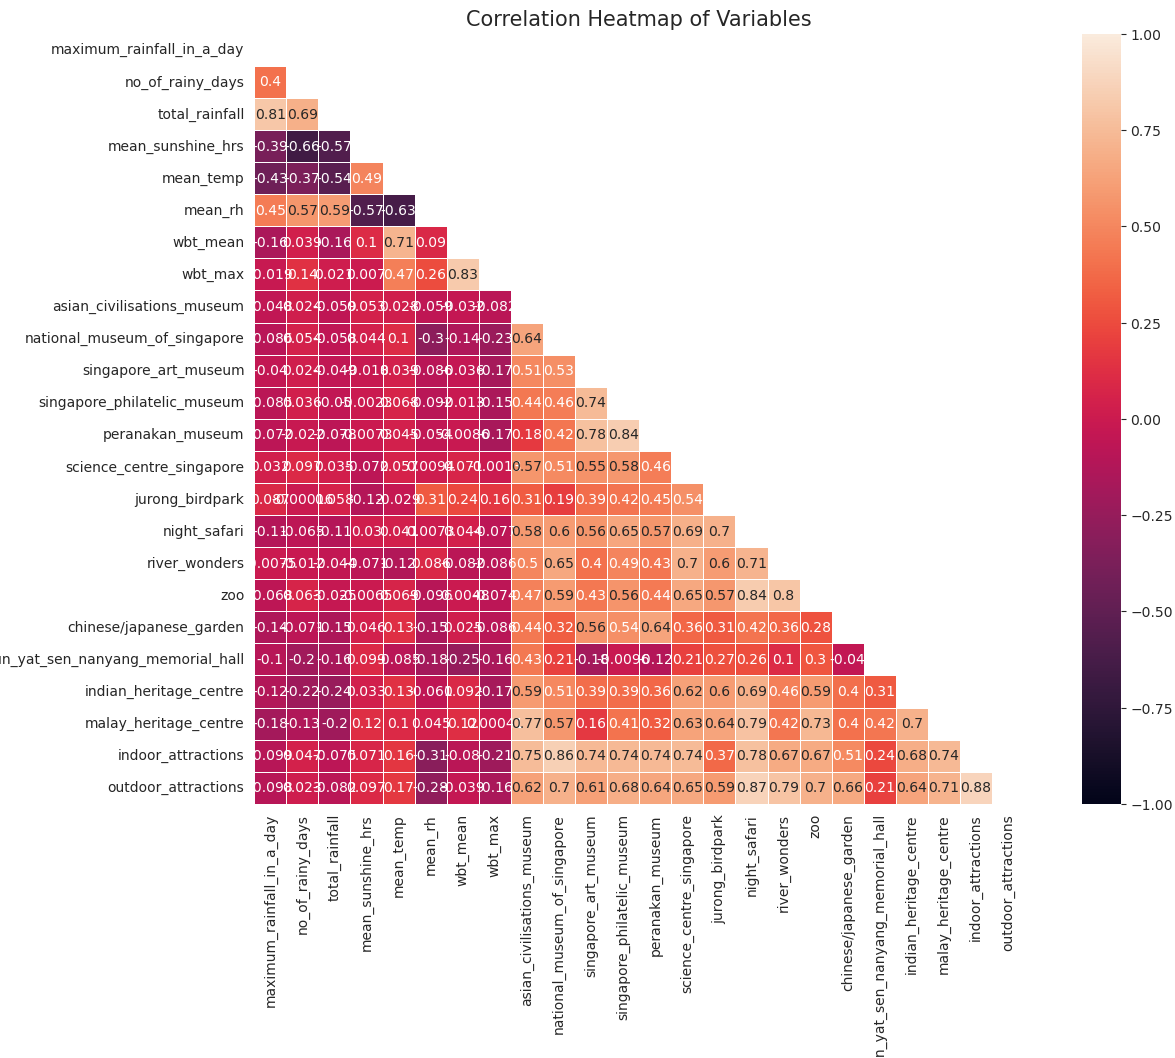

In [135]:
# Plot the correlation matrix in a heatmap to visually identify variables of interest
# for further exploration

# Set figure size
plt.figure(figsize=(15,10))

# Set up mask to mask out upper triangle
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# Plot  correlation heatmap
with sns.axes_style("white"):
    mapplot = sns.heatmap(df_corr, mask = mask, 
                square = True, annot = True, 
                vmin = -1, vmax = 1, linewidths = .5)
    # Specifications for chart
    mapplot.set_title('Correlation Heatmap of Variables', fontdict={'fontsize':15})

plt.show()

#### Observations:
- For indoor attractions, the various institutions (e.g. national museum of singapore vis-a-vis asian civilisations museum...) have strong correlation to one another.
- For outdoor attractions, similarly, the various places of interest (e.g. zoo vis-a-vis night safari..) have strong correlation to one another.
- This pattern is unsurprising. It suggests that we could simplify the analysis to look at only one indoor attraction and one outdoor attraction variable, since the two will likely have similar variations.
- Despite aggregating the indoor and outdoor attractions, correlation coefficient remained low.
- On balance, we will select the following for further analysis since these attractions have more data and they have relatively stronger correlation to the weather attributes:
    1. Indoor attraction: National Museum of Singapore 
    1. Outdoor attraction: Zoo

In [136]:
# Sort weather variables against attendance @ NMS based on correlation
df_corr['national_museum_of_singapore'].abs().sort_values(ascending=False)
# Among the weather variables, attendance@NMS has the strongest correlation with mean_rh, wbt_max, wbt_mean, mean_temp, maximum_rainfall_in_a_day
# We examine the trends for these variables

national_museum_of_singapore         1.000000
indoor_attractions                   0.857021
outdoor_attractions                  0.702485
river_wonders                        0.654319
asian_civilisations_museum           0.637226
night_safari                         0.599953
zoo                                  0.588278
malay_heritage_centre                0.573257
singapore_art_museum                 0.534005
science_centre_singapore             0.512595
indian_heritage_centre               0.507206
singapore_philatelic_museum          0.460464
peranakan_museum                     0.423534
chinese/japanese_garden              0.321949
mean_rh                              0.296208
wbt_max                              0.234123
sun_yat_sen_nanyang_memorial_hall    0.208457
jurong_birdpark                      0.193752
wbt_mean                             0.136033
mean_temp                            0.104600
maximum_rainfall_in_a_day            0.086497
total_rainfall                    

In [137]:
# Sort weather variables against attendance @ zoo based on correlation
df_corr['zoo'].abs().sort_values(ascending=False)
# Among the weather variables, attendance has the strongest correlation with mean_rh, wbt_max, wbt_mean, mean_temp, maximum_rainfall_in_a_day
# We examine the trends for these variables

zoo                                  1.000000
night_safari                         0.835041
river_wonders                        0.799210
malay_heritage_centre                0.732232
outdoor_attractions                  0.697628
indoor_attractions                   0.666514
science_centre_singapore             0.652057
indian_heritage_centre               0.591872
national_museum_of_singapore         0.588278
jurong_birdpark                      0.573438
singapore_philatelic_museum          0.559959
asian_civilisations_museum           0.471340
peranakan_museum                     0.442620
singapore_art_museum                 0.434141
sun_yat_sen_nanyang_memorial_hall    0.295589
chinese/japanese_garden              0.280312
mean_rh                              0.095985
wbt_max                              0.073634
mean_temp                            0.068550
maximum_rainfall_in_a_day            0.068480
no_of_rainy_days                     0.062651
total_rainfall                    

#### Observations:
- <b>Choice of weather variables for further analysis</b>: We choose the weather variables with the highest absolute correlation with attendance, i.e. mean rh, wbt_max, mean_temp, maximum_rainfall_in_a_day., and total_rainfall.

- <b>Interaction with time of year</b>: Given the interest of the CEO in understanding the time of year, we layer on the month variable to explore the interactions between weather and period.

In [138]:
# Define variables of interest for further analysis
variables = ['mean_rh', 'wbt_max', 'mean_temp', 'maximum_rainfall_in_a_day', 'total_rainfall', 'month']

<Figure size 1000x1500 with 0 Axes>

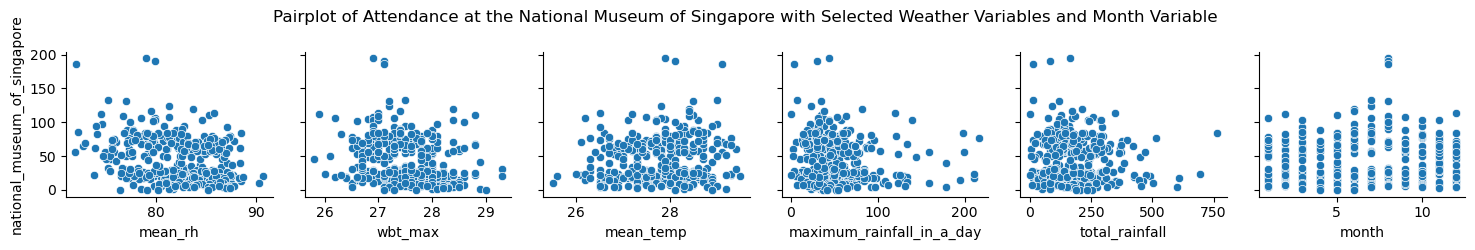

In [139]:
# Create pair-plot to have a quick look at correlation with attendance at NMS
plt.figure(figsize=(10,15))
pairplot = sns.pairplot(df, x_vars=variables, y_vars='national_museum_of_singapore')

# Specifications of chart
pairplot.fig.suptitle('Pairplot of Attendance at the National Museum of Singapore with Selected Weather Variables and Month Variable')
plt.tight_layout()

<Figure size 1000x1500 with 0 Axes>

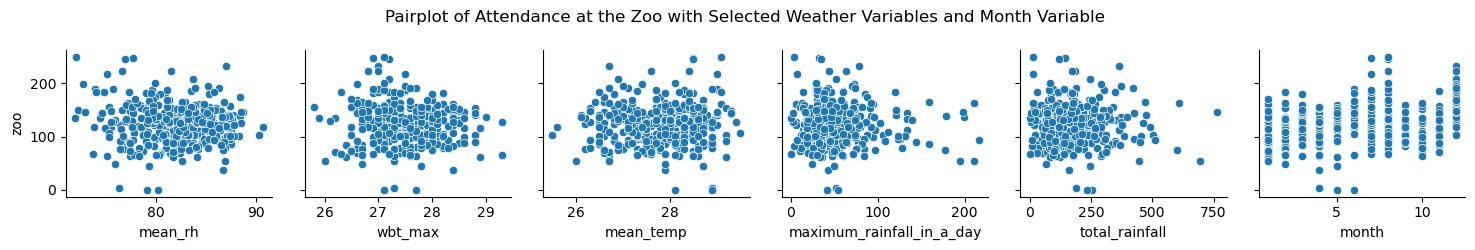

In [140]:
# Create pair-plot to have a quick look at correlation with attendance at the zoo
plt.figure(figsize=(10,15))
pairplot = sns.pairplot(df, x_vars=variables, y_vars='zoo')

# Specifications of chart
pairplot.fig.suptitle('Pairplot of Attendance at the Zoo with Selected Weather Variables and Month Variable')
plt.tight_layout()

#### Observations:
Unsurprisingly, variables and attendance do not seem to follow a strong clear pattern, which reflects the weak correlation from the earlier heatmap.

In [141]:
# Create list of month strings for chart labelling
month_list = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

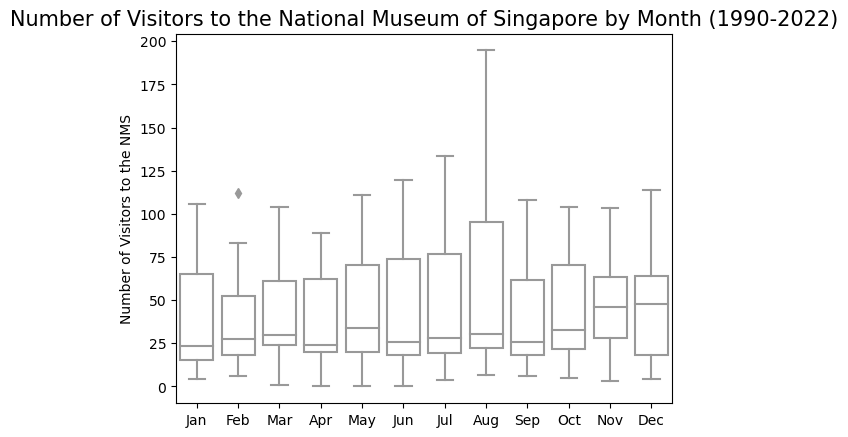

In [142]:
# Plotting boxplots for NMS' attedance variations by month
bplot = sns.boxplot(data=df, x='month', y='national_museum_of_singapore', color='white')
bplot.set_xticklabels(month_list)
bplot.set_xlabel('')
bplot.set_ylabel('Number of Visitors to the NMS')
bplot.set_title('Number of Visitors to the National Museum of Singapore by Month (1990-2022)', fontdict={'fontsize':15})

plt.show()

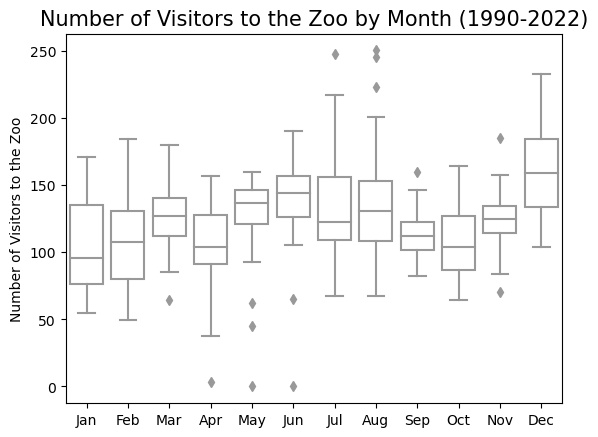

In [143]:
# Plotting boxplots for the zoo's attedance variations by month
bplot = sns.boxplot(data=df, x='month', y='zoo', color='white')
bplot.set_xticklabels(month_list)
bplot.set_xlabel('')
bplot.set_ylabel('Number of Visitors to the Zoo')
bplot.set_title('Number of Visitors to the Zoo by Month (1990-2022)', fontdict={'fontsize':15})

plt.show()

#### Observation:
- No clear period of the year when attendance at the National Museum of Singapore is significantly higher and hence needing more resources. 
- Higher footfall observed in Dec/ year-end period at the zoo.

In [144]:
# Function to split numeric variables into percentiles to make plotting of heatmaps easier to interpret
def get_quad_labels(df, variables):
    for variable in variables:
        df[variable + '_quad'] = pd.qcut(df[variable], q=4, labels=['25P', '50P','75P', '100P'])
        
# Function to split numeric variables into percentiles by groups of mth to make plotting of heatmaps easier to interpret
def get_quad_labels_by_mth(df, variables, num_percentiles):
    # Generate labels of percentiles
    per_labels = [str(x) + 'P' for x in np.linspace(0,100,num_percentiles+1,dtype='int')[1:]]
    for variable in variables:
        df[variable + '_quad'] = df.groupby('month')[variable].apply(lambda x: pd.qcut(x, q=num_percentiles, 
                                                                                       labels=per_labels, 
                                                                                       duplicates='drop'))

In [145]:
#df = df['1990-12-01':'2022-08-31'] 

In [146]:
# Convert weather variables into categorical for easier heatmap plotting, 
# we use quartiles for easier interpretation, given that there are limited datapoints
get_quad_labels_by_mth(df, variables[:-1], 4)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 381 entries, 1990-12-01 to 2022-08-01
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   maximum_rainfall_in_a_day          381 non-null    float64 
 1   no_of_rainy_days                   381 non-null    float64 
 2   total_rainfall                     381 non-null    float64 
 3   mean_sunshine_hrs                  381 non-null    float64 
 4   mean_temp                          381 non-null    float64 
 5   mean_rh                            381 non-null    float64 
 6   wbt_mean                           381 non-null    float64 
 7   wbt_max                            381 non-null    float64 
 8   asian_civilisations_museum         305 non-null    float64 
 9   national_museum_of_singapore       381 non-null    float64 
 10  singapore_art_museum               320 non-null    float64 
 11  singapore_philatelic_museu

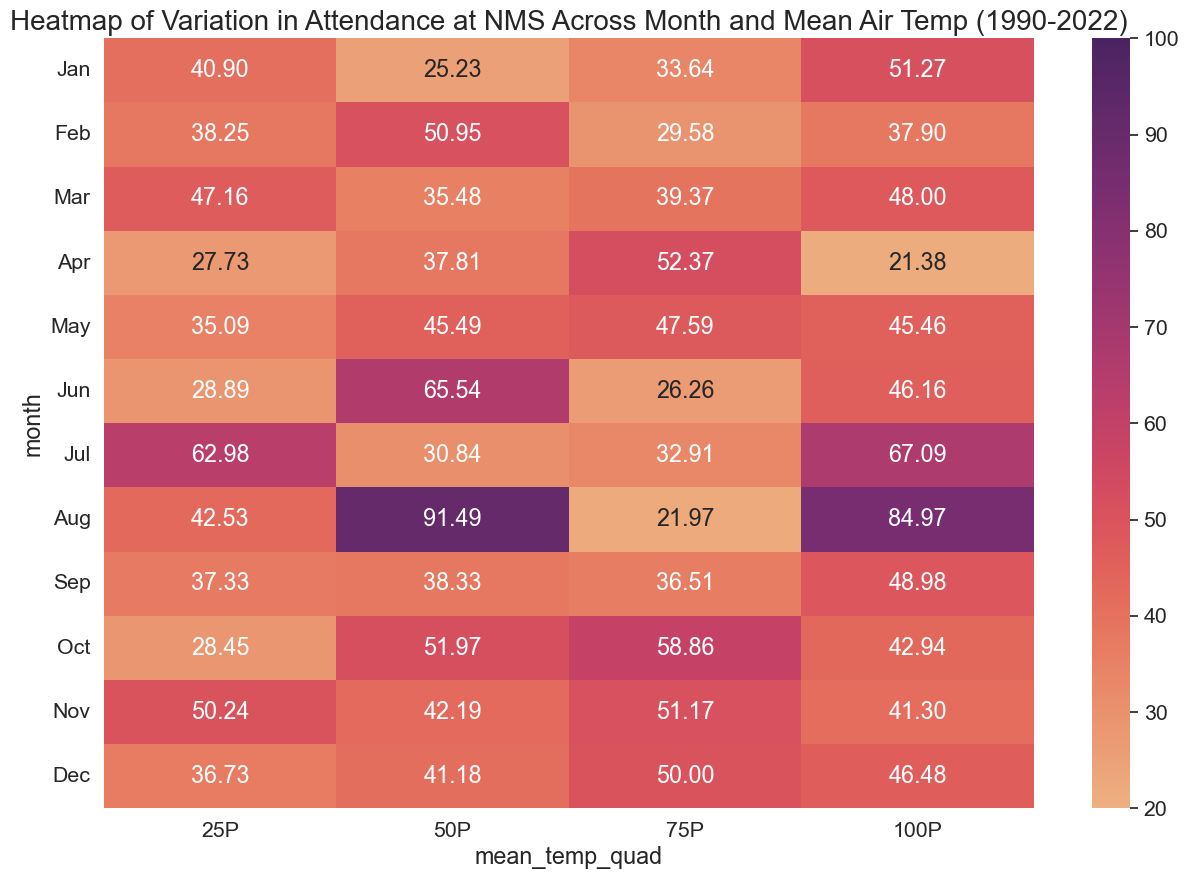

In [147]:
# Heatmap for month vs mean_temp
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['mean_temp_quad'], df['national_museum_of_singapore'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=100, vmin=20, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at NMS Across Month and Mean Air Temp (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

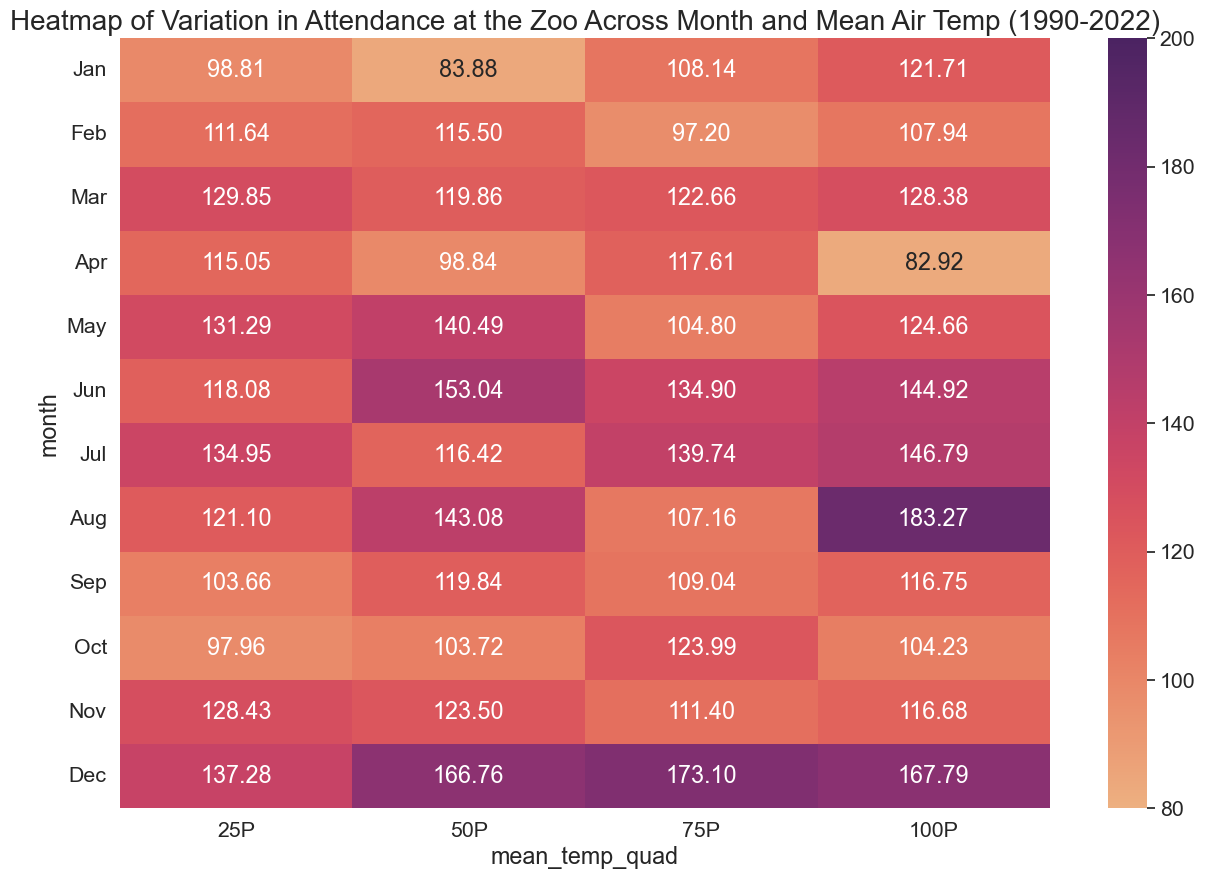

In [148]:
# Heatmap for month vs mean_temp
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['mean_temp_quad'], df['zoo'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=200, vmin=80, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at the Zoo Across Month and Mean Air Temp (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#Observation:
- Mean air temp in the highest quartile of historical air temp generally correlated with higher attendance at the zoo, especially in the months of Aug and Dec.
- No clear observations for the attendance vis-a-vis mean air temp at the National Museum of Singapore.

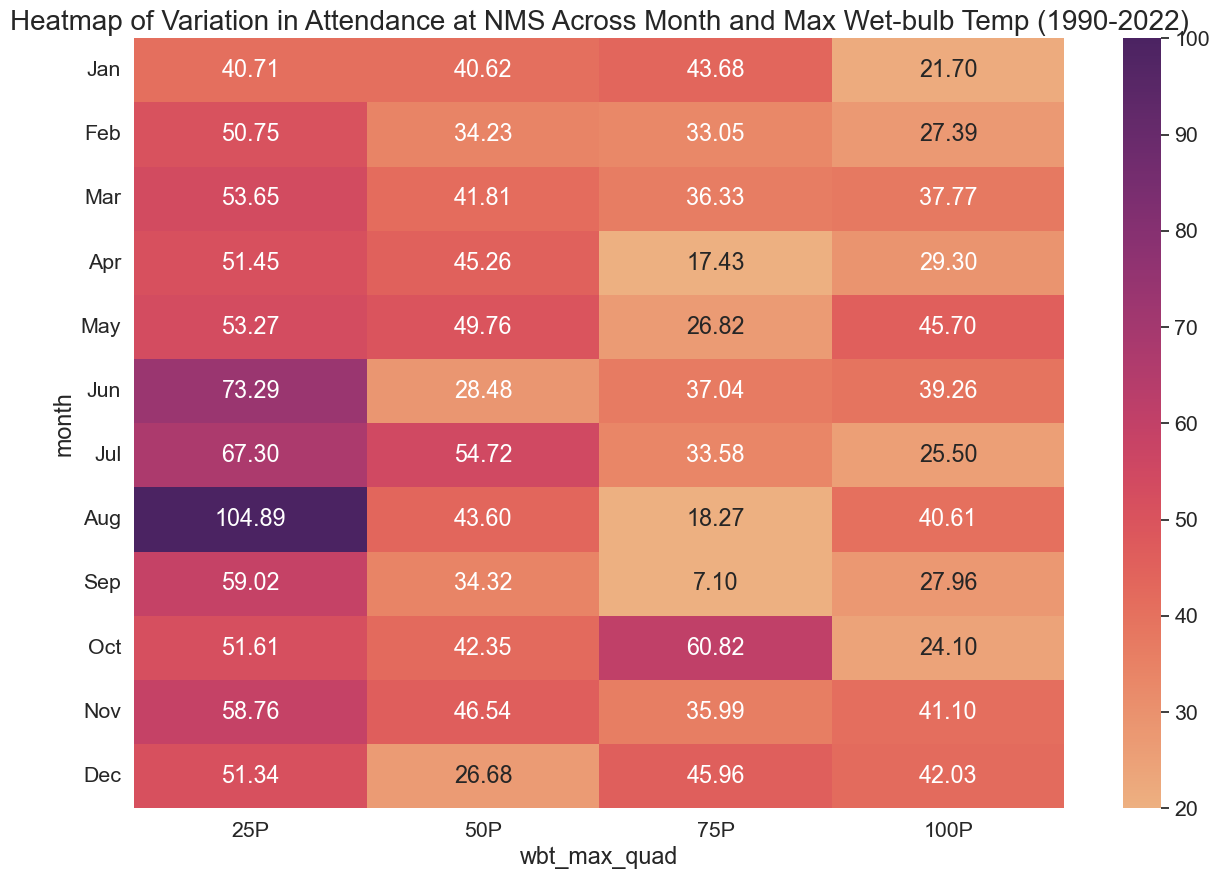

In [149]:
# Heatmap for month vs wbt_max_quad
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['wbt_max_quad'], df['national_museum_of_singapore'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=100, vmin=20, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at NMS Across Month and Max Wet-bulb Temp (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

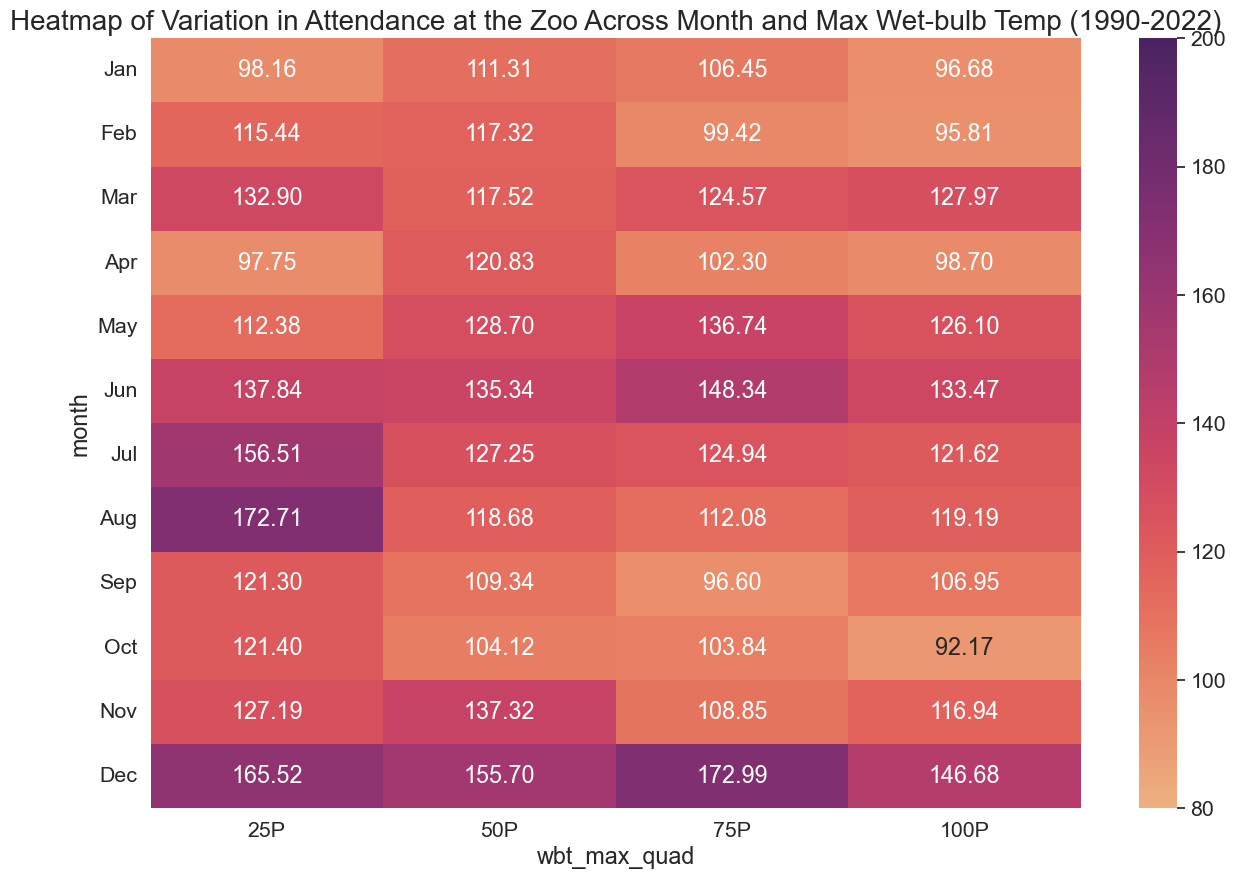

In [150]:
# Heatmap for month vs wbt_max_quad
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['wbt_max_quad'], df['zoo'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=200, vmin=80, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at the Zoo Across Month and Max Wet-bulb Temp (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#Observations:
- Max wet-bulb temp in the lowest quartile of historical temp generally correlated with higher attendance at the National Museum of Singapore, especially in the months of Aug and Jun.
- For the zoo,  the observations are less clear, across the various quartiles of max wet-bulb temp. For example, in Dec, the number of visitors remained high across all four quartiles.

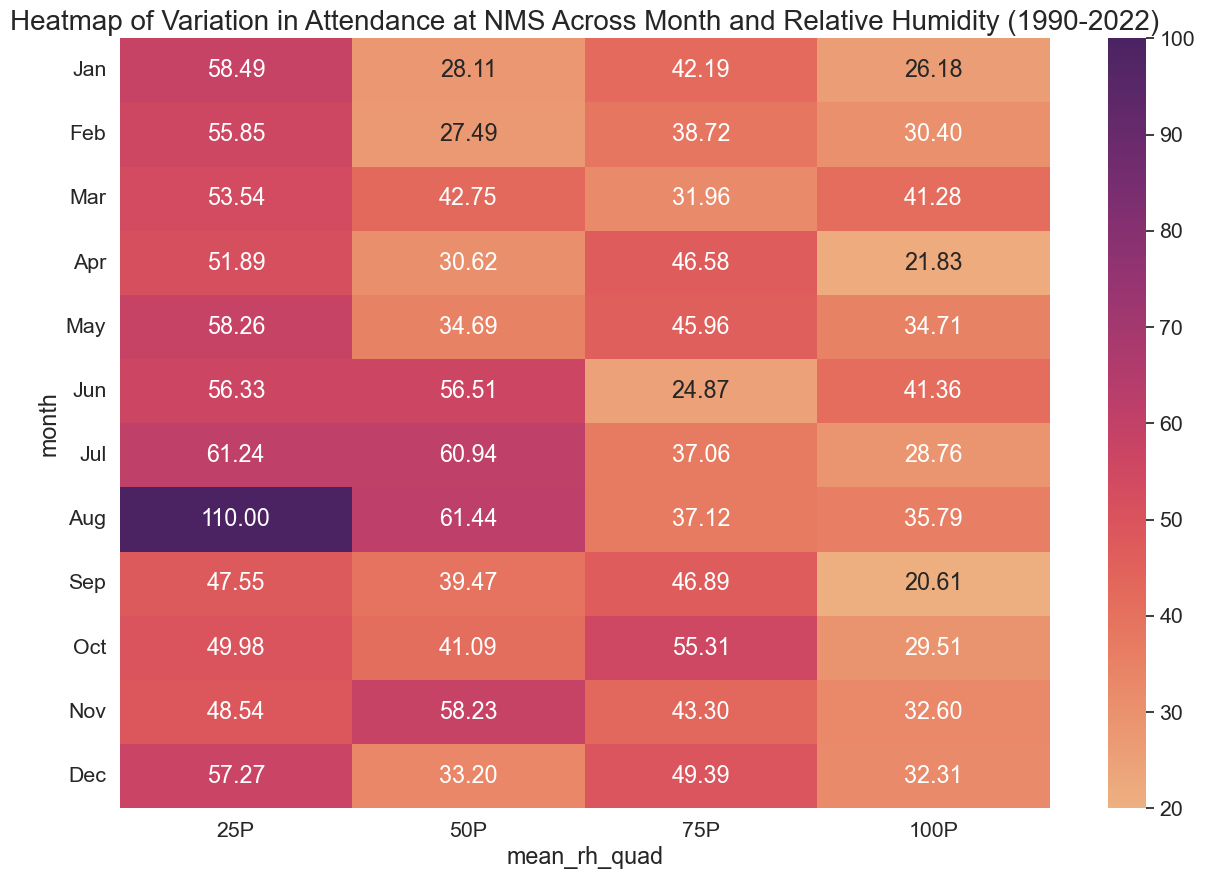

In [151]:
# Heatmap for month vs mean_rh_quad
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['mean_rh_quad'], df['national_museum_of_singapore'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=100, vmin=20, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at NMS Across Month and Relative Humidity (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

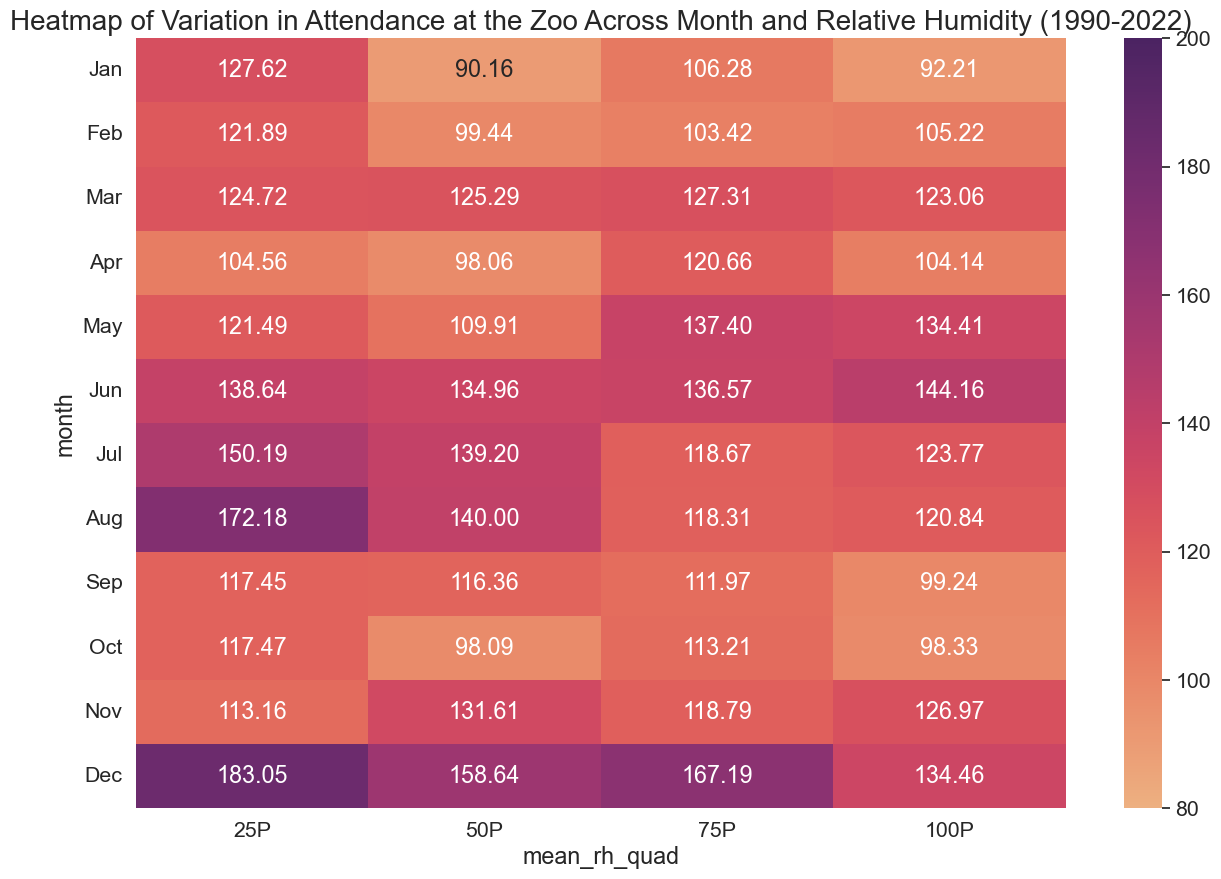

In [152]:
# Heatmap for month vs mean_rh_quad
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['mean_rh_quad'], df['zoo'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=200, vmin=80, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at the Zoo Across Month and Relative Humidity (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

#Observations:
- Mean relative humidity in the lowest quartile of historical rh generally correlated with higher attendance at the National Museum of Singapore, especially in the month of Aug. The observations are less clear for the zoo.
- Combined with earlier analysis of max wet-bulb temp , a combination of these 2 may have a strong correlation to high attendance. We will explore this further subsequently.

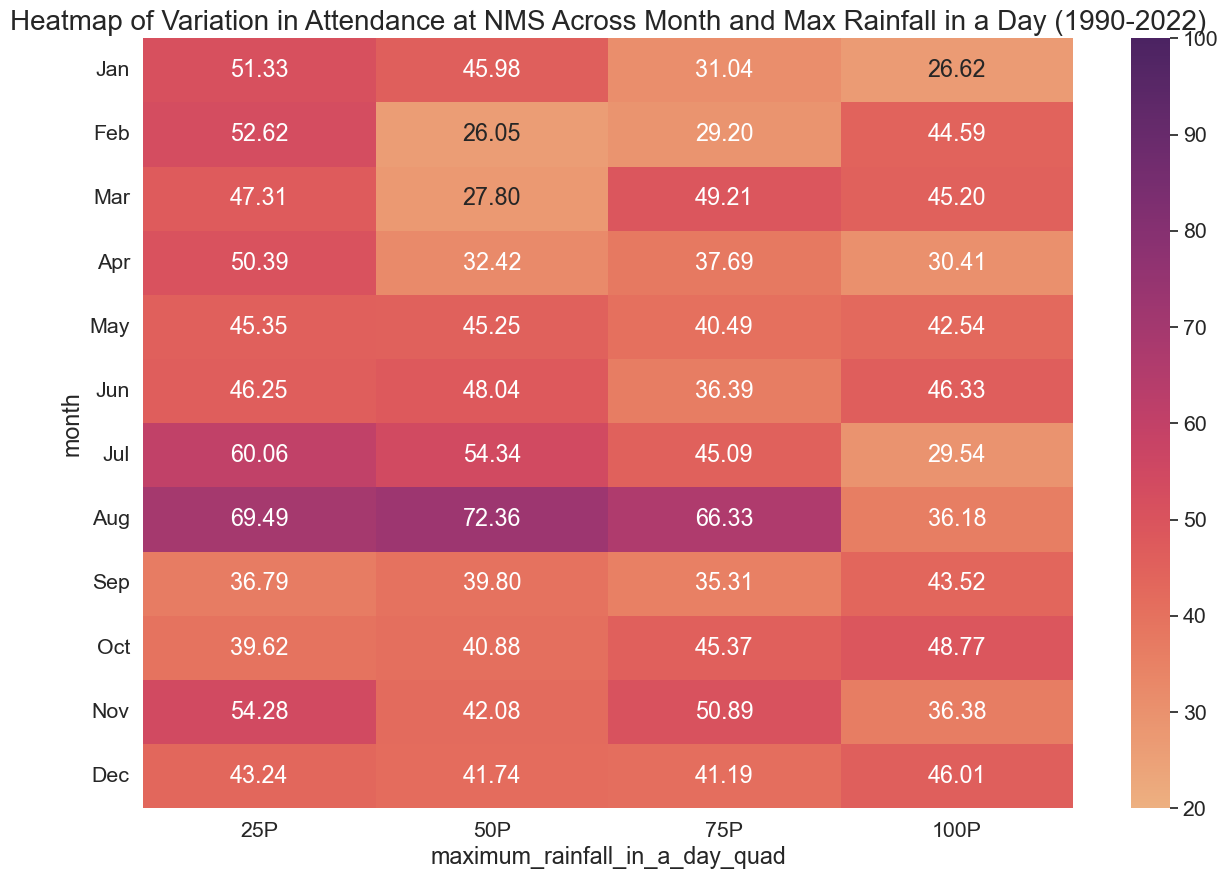

In [153]:
# Heatmap for month vs maximum_rainfall in a day
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['maximum_rainfall_in_a_day_quad'], df['national_museum_of_singapore'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=100, vmin=20, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at NMS Across Month and Max Rainfall in a Day (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

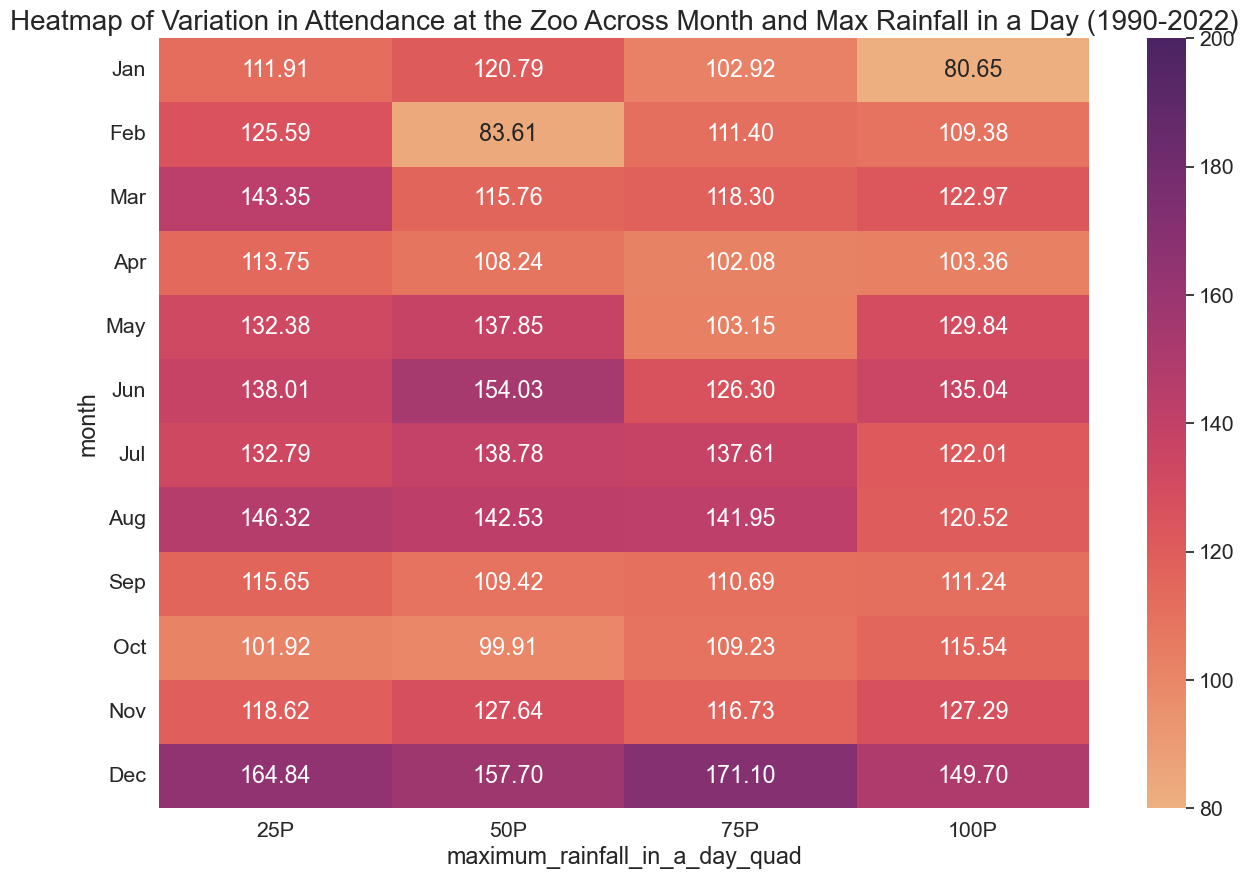

In [154]:
# Heatmap for month vs maximum_rainfall in a day
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['maximum_rainfall_in_a_day_quad'], df['zoo'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=200, vmin=80, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at the Zoo Across Month and Max Rainfall in a Day (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

Observations
- Max rainfall in a day in the lowest quartile of historical rainfall generally correlated with high attendance at the National Museum of Singapore, especially in the months of Jul and Aug. No clear observations for the zoo.
- Patterns not very clear for NMS, which is not surprising considering that max rainfall in a day has the lowest correlation with attendance at the museum out of the selected variables.

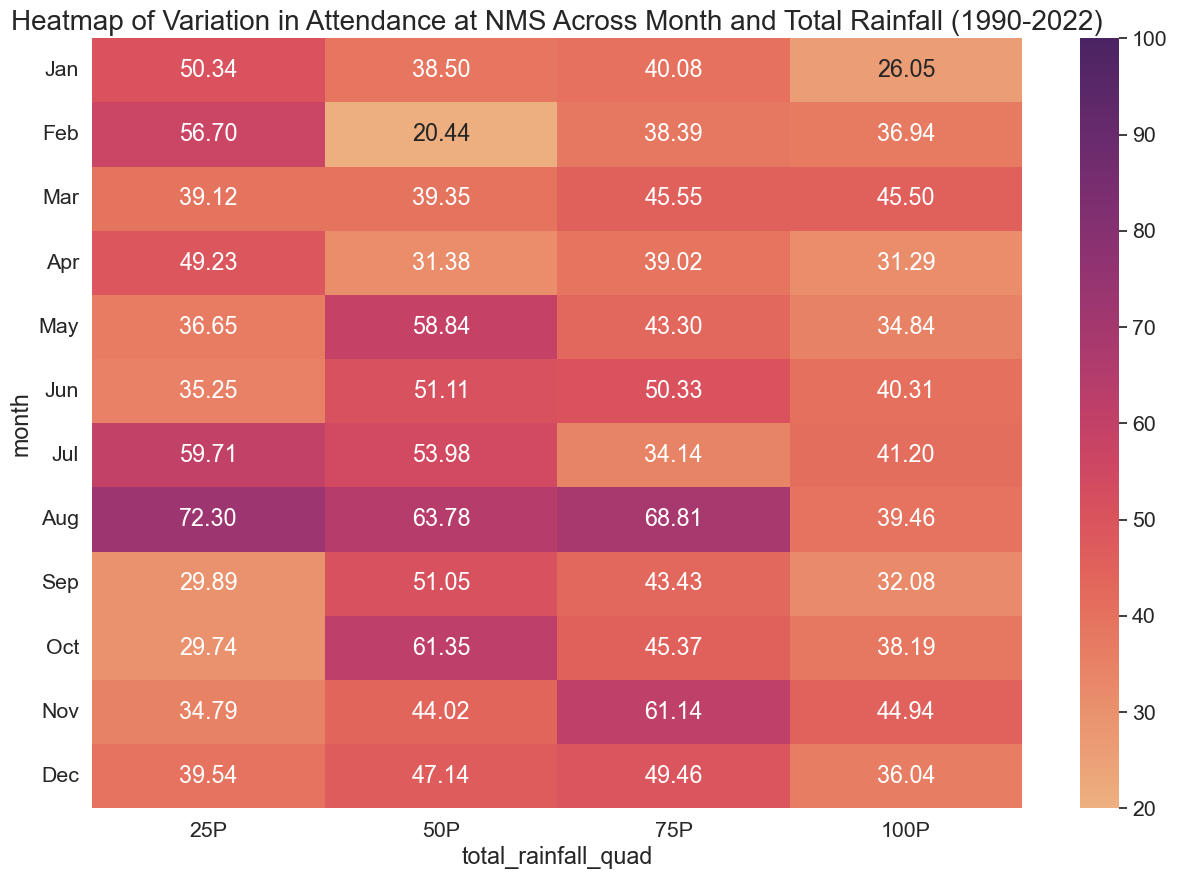

In [155]:
# Heatmap for month vs total rainfall
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['total_rainfall_quad'], df['national_museum_of_singapore'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=100, vmin=20, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at NMS Across Month and Total Rainfall (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

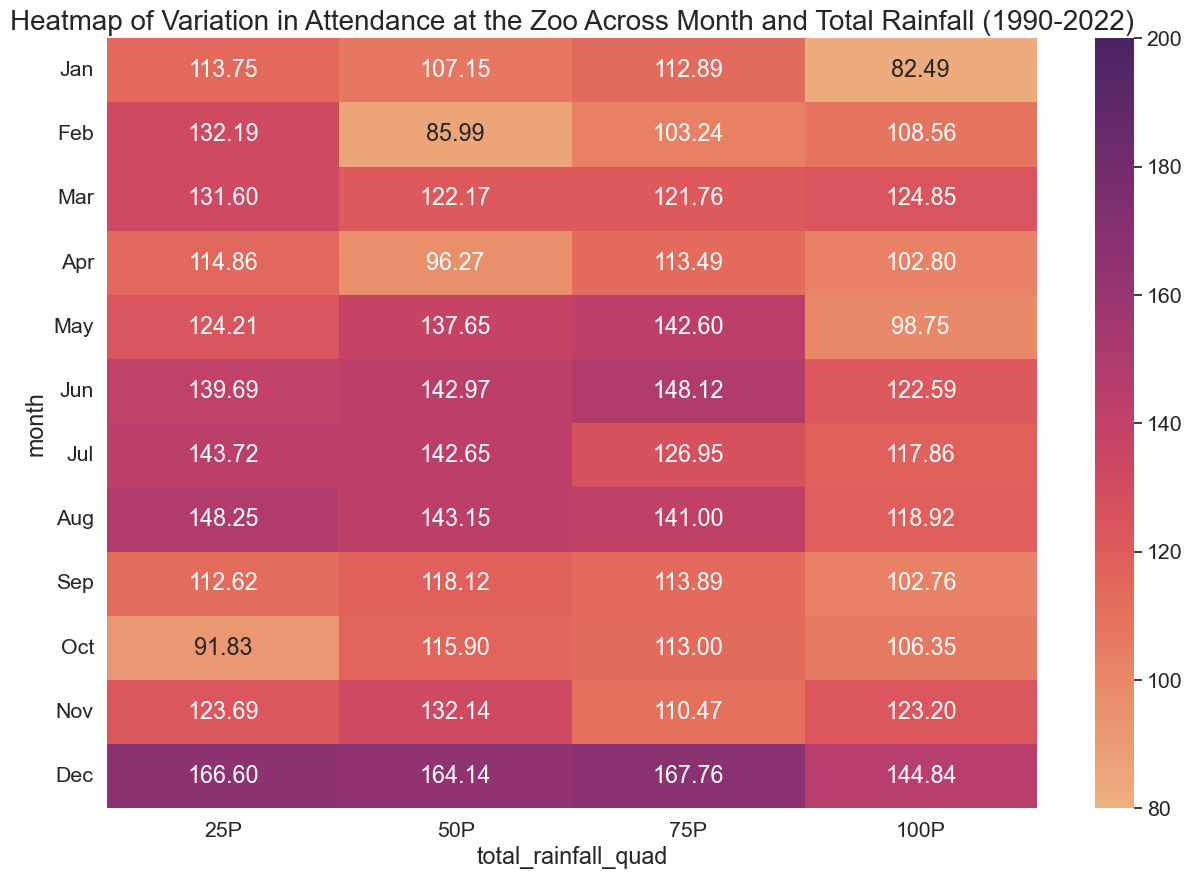

In [156]:
# Heatmap for month vs total rainfall
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['month'], df['total_rainfall_quad'], df['zoo'], aggfunc=np.mean), 
            yticklabels=month_list,
            annot=True, fmt='.2f', vmax=200, vmin=80, cmap='flare')
mapplot.set_title('Heatmap of Variation in Attendance at the Zoo Across Month and Total Rainfall (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

Observations:
- For Total Rainfall, observations were similar to max rainfall in a day. i.e. in the lowest quartile of historical total rainfall generally correlated with high attendance at the National Museum of Singapore, especially in the months of Jul and Aug. No clear observations for the zoo. 
- Similarly patterns not very clear, which is not surprising considering that total rainfal has the lowest correlation with attendance out of the selected variables. Hence, we will focus subsequent analysis on the other 3 selected variables (i.e. Mean Air Temp, Wet Bulb Temp and Relative Humidity)

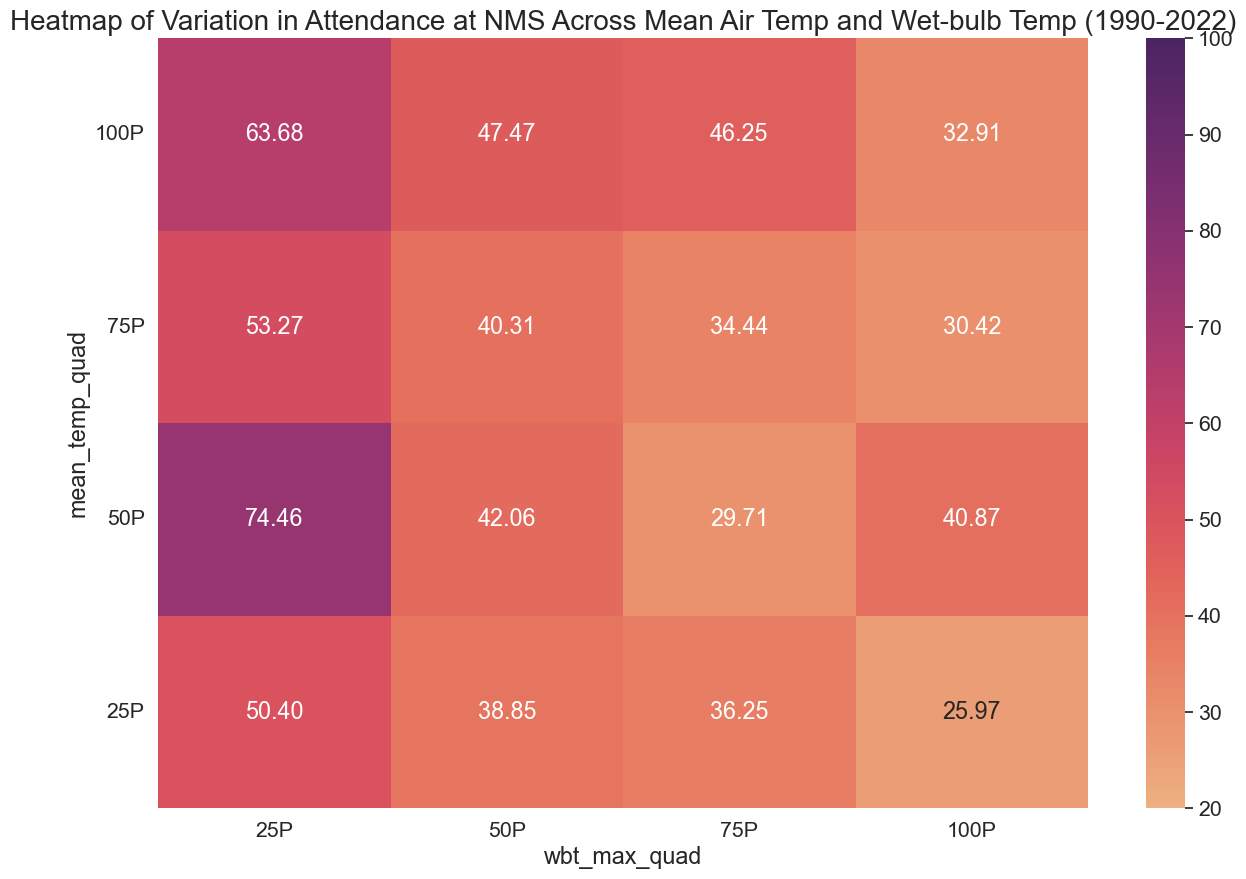

In [157]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['mean_temp_quad'], df['wbt_max_quad'], df['national_museum_of_singapore'], aggfunc=np.mean), 
            annot=True, fmt='.2f', vmax=100, vmin=20, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Attendance at NMS Across Mean Air Temp and Wet-bulb Temp (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

Observations: 
- Moderate air temperature (P50) and lower than usual wet-bulb temp (lowest quartile) associated with high attendance at the National Museum of Singapore. 
- This implies that months where these 2 factors are compounded will likely see higher attendance at the museum, i.e. Jun and Aug.

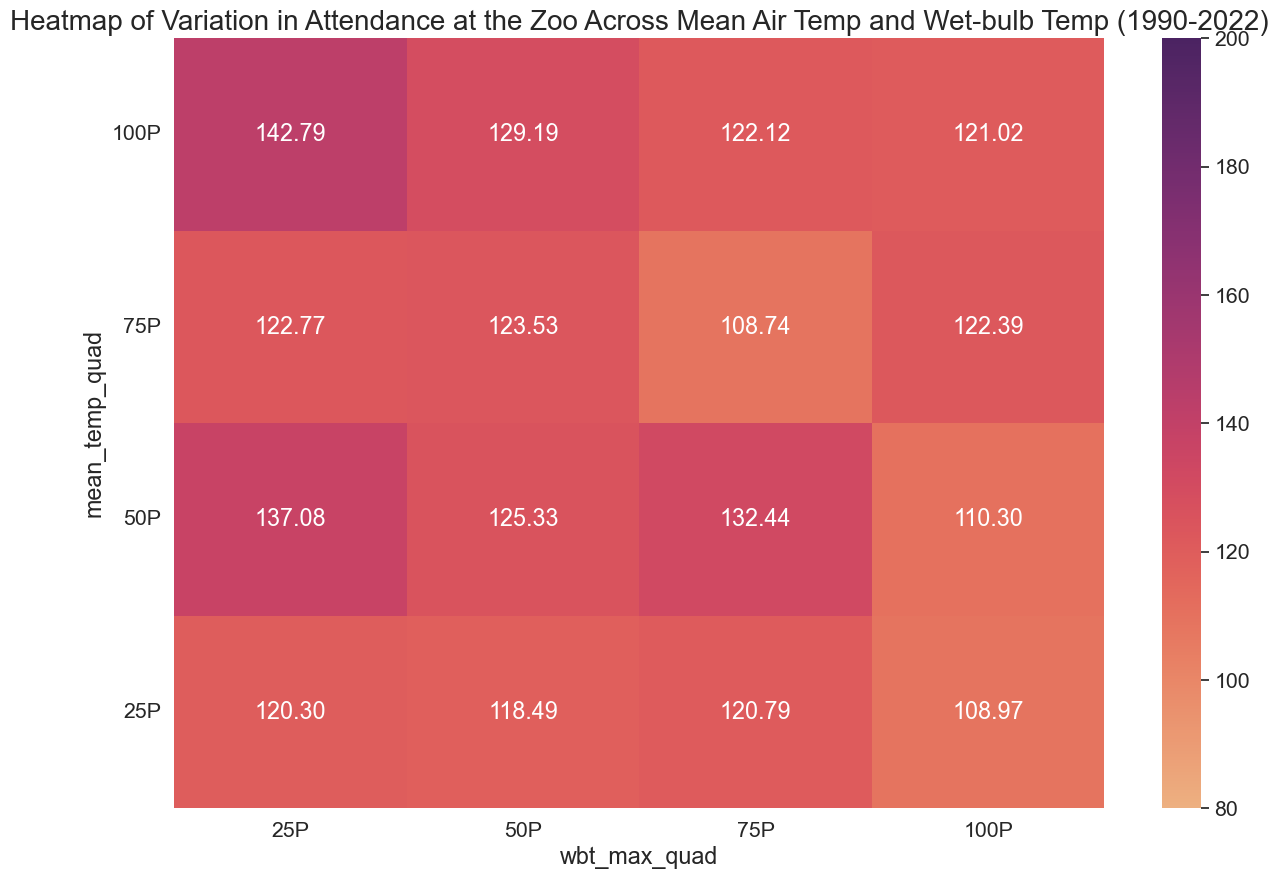

In [158]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['mean_temp_quad'], df['wbt_max_quad'], df['zoo'], aggfunc=np.mean), 
            annot=True, fmt='.2f', vmax=200, vmin=80, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Attendance at the Zoo Across Mean Air Temp and Wet-bulb Temp (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

Observations:
- No clear patterns observed

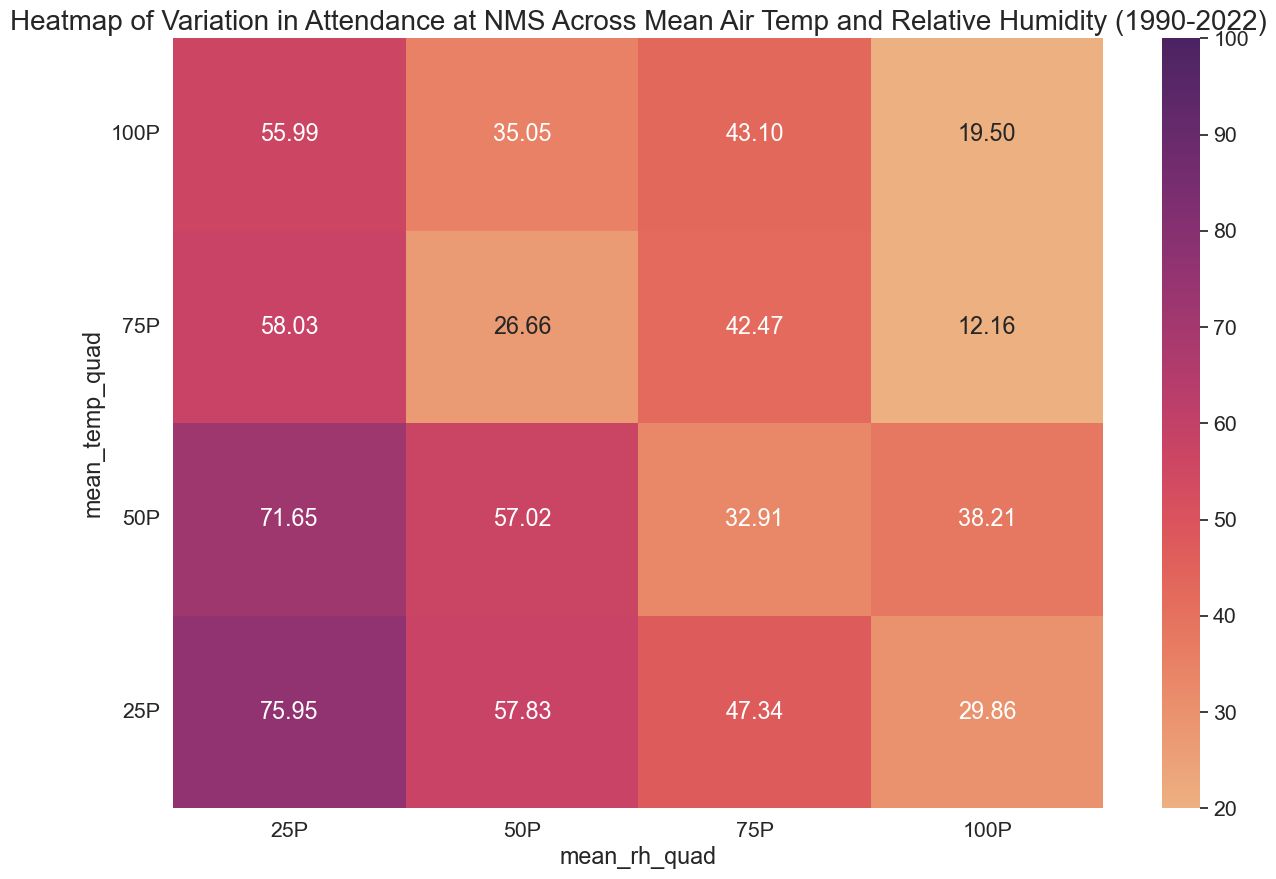

In [159]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['mean_temp_quad'], df['mean_rh_quad'], df['national_museum_of_singapore'], aggfunc=np.mean), 
            annot=True, fmt='.2f', vmax=100, vmin=20, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Attendance at NMS Across Mean Air Temp and Relative Humidity (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

Observations: 
- Lower mean air temp (P50 & below) and lower humidity (P50 and below) associated with higher attendance at the National Museum of Singapore.
- This implies that the months of Jun-Aug where these 2 factors are compounded will likely see higher footfall at the museum

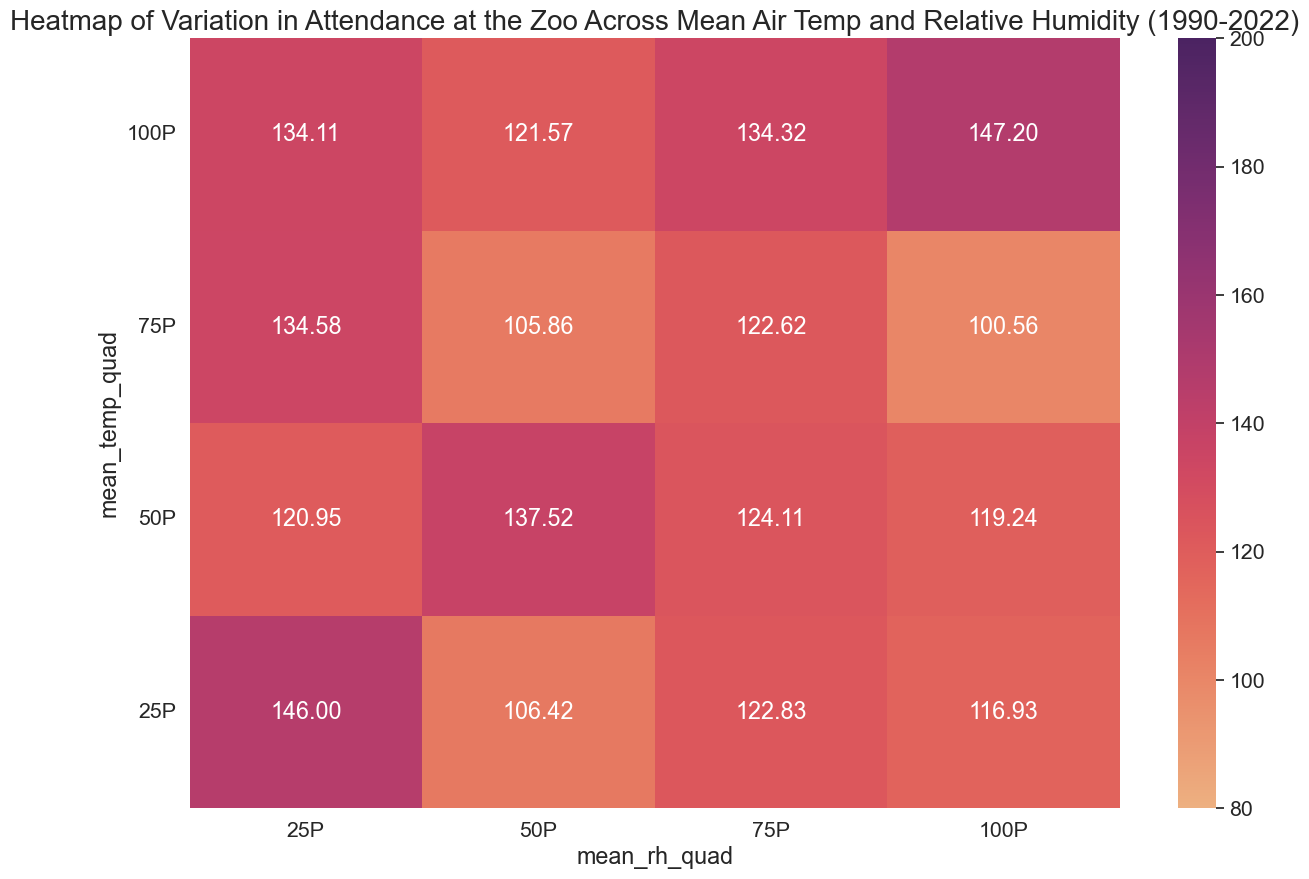

In [160]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['mean_temp_quad'], df['mean_rh_quad'], df['zoo'], aggfunc=np.mean), 
            annot=True, fmt='.2f', vmax=200, vmin=80, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Attendance at the Zoo Across Mean Air Temp and Relative Humidity (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

Observations:
- No clear patterns observed

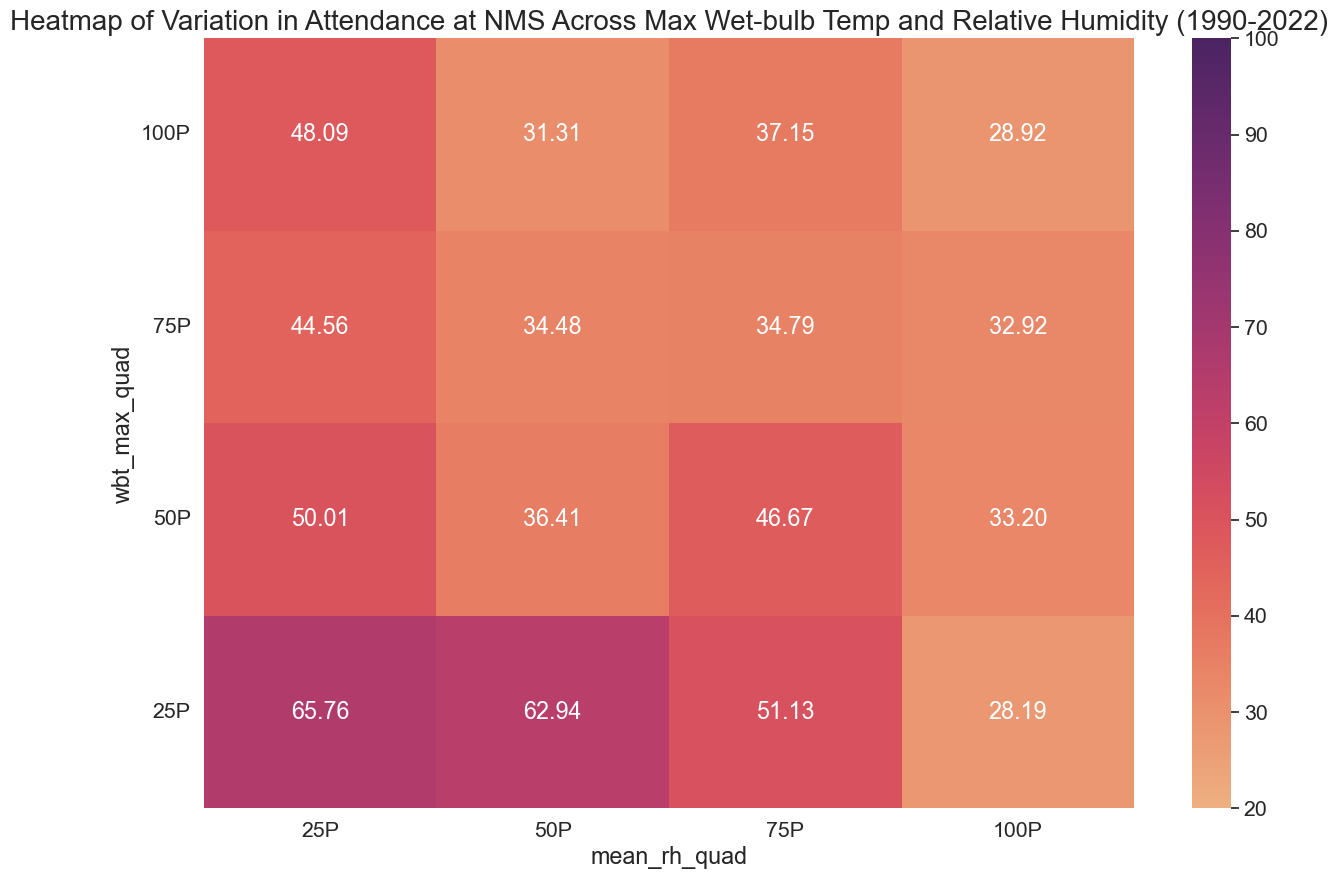

In [161]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['wbt_max_quad'], df['mean_rh_quad'], df['national_museum_of_singapore'], aggfunc=np.mean), 
            annot=True, fmt='.2f', vmax=100, vmin=20, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Attendance at NMS Across Max Wet-bulb Temp and Relative Humidity (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

Observations:
- Expectedly, lower max wet-bulb temp and lower relative humidity associated with higher attendance at the National Museum of Singapore. This correpsonds with the months of Jun - Aug and corroborates with the findings above.

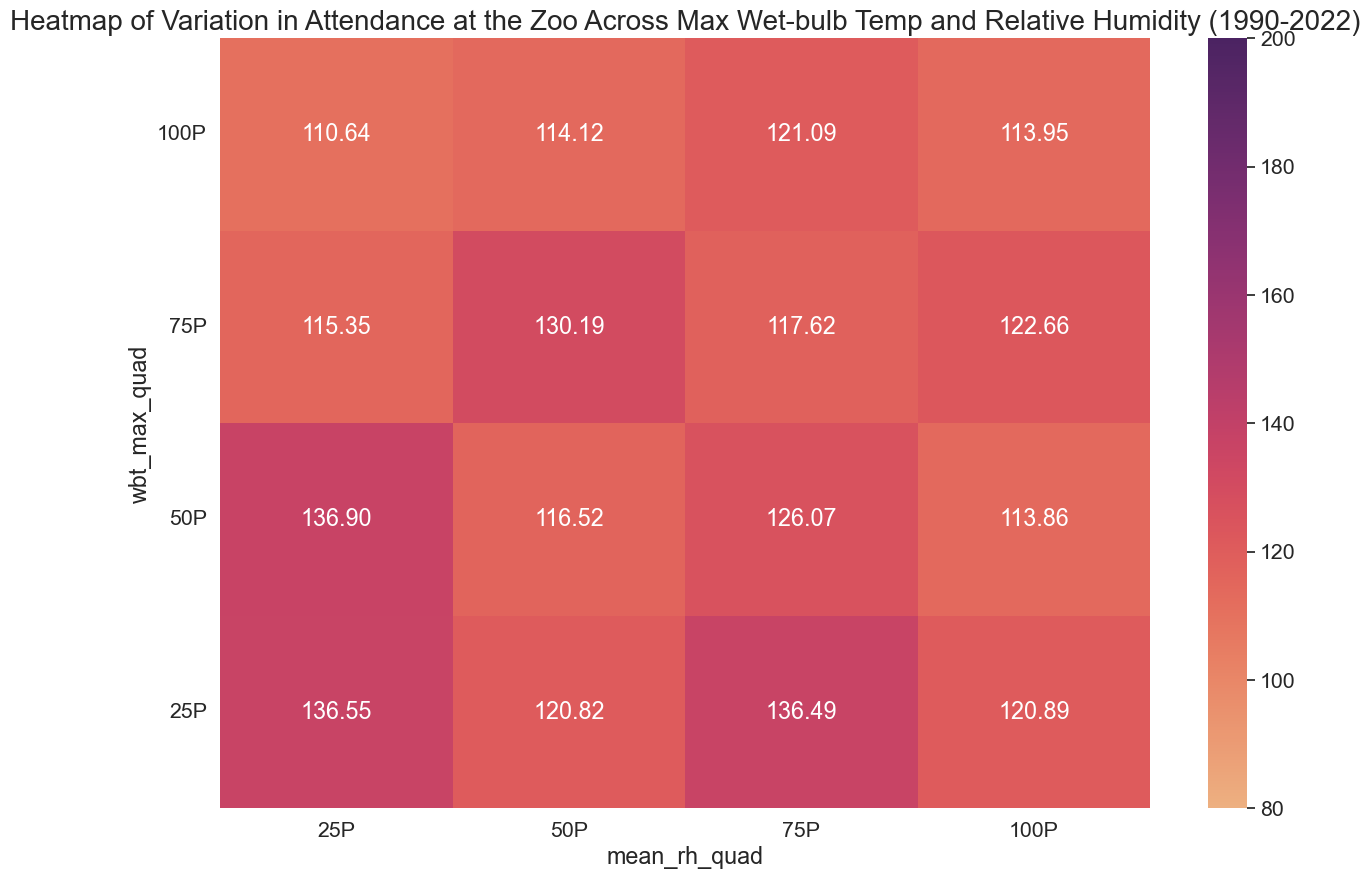

In [162]:
# Plot heatmap to examine interaction of weather variables
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)

mapplot = sns.heatmap(pd.crosstab(df['wbt_max_quad'], df['mean_rh_quad'], df['zoo'], aggfunc=np.mean), 
            annot=True, fmt='.2f', vmax=200, vmin=80, cmap='flare')
mapplot.invert_yaxis()
mapplot.set_title('Heatmap of Variation in Attendance at the Zoo Across Max Wet-bulb Temp and Relative Humidity (1990-2022)',
                 fontdict={'fontsize':20})

plt.yticks(rotation=0)
plt.show()

Observations:
- No clear patterns.

## Conclusions and Recommendations

1. To a certain extent, weather plays a part in the expected resourcing needed at the museums to cater to the higher footfall, in part due to the higher number of museum visitors associated with different weather conditions during different periods of the year. It is observed that a combination of weather conditions can also have an impact on the number of museum visitors.

2. In summary, more resourcing could be prepared under these circumstances:
    - Moderate air temperature (P50) and lower than usual wet-bulb temp (lowest quartile).
    - Lower mean air temp (P50 & below) and lower humidity (P50 and below) 
    - Lower max wet-bulb temp and lower relative humidity

3. In the months of Jun, Jul and in particular Aug, especially when wet-bulb temp and relative humidity are low. With the knowledge that a segment of visitors are encouraged to visit during these periods, the museums may consider purchasing online ads particularly during these periods featuring on weather applications.

4. For complementary markets/outdoor leisure, the patterns of weather conditions vis-a-vis attendance was less clear. This could be because of several factors, for example, the availability of both indoor and outdoor spaces at large outdoor places of interest, etc. 

5. Other considerations/ limitations of this study that we could examine further include:

    - Examining the accessibility: A mitigating factor to ease of accessing leisure activities under various weather conditions. 
    - Examining intraday dynamics: Time specific effects of weather in a day (e.g.persistent rain) and individual responses.
    - Examining effects of ticketing/ programmes:  Time-limited exhitbions, pre-paid bookings, etc.